# 따릉이 데이터 EDA

## 목차
1. 라이브러리 불러오기
2. 데이터 불러오기
3. 가설 세우기
4. 데이터 살펴보기
5. 데이터 전처리하기
6. 변수들 간의 그래프
7. 가설 검정

## 1. 라이브러리 불러오기

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'  #선명하게 만들기
%matplotlib inline

## 2. 데이터 불러오기 

In [3]:
%pwd
#현재 폴더 위치 확인

'C:\\Users\\6aimh\\OneDrive\\바탕 화면\\b.a.f\\2주차'

In [92]:
import pandas as pd
cycle1=pd.read_csv("../train.csv",encoding='cp949')
cycle=cycle1.copy()
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,24/10/2018,1492,16,NaN,42,1.3,1976,5.0,1.22,0.0,0.0,NaN,No Holiday,Yes
1,01/05/2018,1536,14,23.0,64,2.8,520,15.8,1.59,0.0,0.0,Spring,Holiday,Yes
2,14/11/2018,327,2,6.2,59,0.6,1584,-1.2,0.00,0.0,0.0,Autumn,No Holiday,Yes
3,31/08/2018,170,4,23.2,83,1.6,1102,20.1,0.00,0.0,0.0,Summer,No Holiday,Yes
4,26/06/2018,45,5,23.7,64,0.9,876,16.4,0.00,0.1,0.0,Summer,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,08/02/2018,255,7,-9.6,67,1.0,1503,-14.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7004,28/03/2018,104,4,10.6,77,0.9,422,6.7,0.00,0.0,0.0,Spring,No Holiday,Yes
7005,30/04/2018,569,0,14.7,54,1.3,718,5.4,0.00,0.0,0.0,Spring,No Holiday,Yes
7006,29/05/2018,2234,8,20.5,66,1.7,1062,13.9,0.34,0.0,0.0,Spring,No Holiday,Yes


### - 데이터의 열에 대한 설명
- Date                           : 날짜
- Rented Bike Count              : 대여한 자전거 수
- Hour                           : 대여 시각
- Temperature(°C)               : 기온(°C)
- Humidity(%)                    : 습도(%)
- Wind speed (m/s)               : 바람 세기(m/s)
- Visibility (10m)               : 시야(10m)
- Dew point temperature(°C)     : 이슬점(일정한 압력에서 공기의 온도를 낮추어 갈 때 공기 중의 수증기가 포화하여 이슬이 맺힐 때의 온도,습도에 비례)
- Solar Radiation (MJ/m2)        : 태양 복사열(MJ/m2)
- Rainfall(mm)                   : 강우량(mm)
- Snowfall (cm)                  : 적설량(cm)
- Seasons                        : 계절
- Holiday                        : 휴일
- Functioning Day                : 기능 가능일
- Month                          : 데이터의 월
- Day Of Week                    : 데이터의 요일

# 3. 가설 세우기

> 단일 변수 가설

1. 기온이 높으면 자전거 대여 수가 적을 것이다.
2. 습도가 높으면 자전거 대여 수가 적을 것이다.
3. 바람 세기가 세면 자전거 대여 수가 적을 것이다.
4. 태양 복사열이 세면 자전거 대여 수가 적을 것이다.
5. 강우량이 많으면 자전거 대여 수가 적을 것이다.
6. 적설량이 많으면 자전거 대여 수가 적을 것이다.
7. 겨울이 가장 자전거 대여 수가 적을 것이다.
8. 휴일이 평일에 비해 자전거 대여 수가 많을 것이다.
9. 기능 가능일에만 자전거를 대여할 수 있을 것이다.
10. 학생들 여름방학 기간인 7, 8월에는 자전거 사용량이 많을 것이다. (대학생뿐만 아니라 초중고 학생들도 방학이므로)
11. 벚꽃놀이 시즌인 3월 말에서 4월 중순에 자전거 대여량이 많을 것이다.

> 2개 이상의 독립변수를 이용한 가설

- 휴일에는 나들이 나온 사람들의 사용량이 많을 것이다. 따라서 낮 시간대 사용량이 많을 것이다.
- 평일에는 직장인들의 출퇴근길 시각에 사용량이 많을 것이다.

# 4. 데이터 살펴보기

#### 정보 확인
- 7008개의 행과 14개의 열로 이루어짐.
- Temperature(°C), Wind speed (m/s), Seasons 열에만 결측치가 존재함.
- object형 데이터로 이루어진 열이 있다. (Date, Seasons, Holiday, Functioning Day 열)

In [93]:
cycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008 entries, 0 to 7007
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       7008 non-null   object 
 1   Rented Bike Count          7008 non-null   int64  
 2   Hour                       7008 non-null   int64  
 3   Temperature(°C)            6306 non-null   float64
 4   Humidity(%)                7008 non-null   int64  
 5   Wind speed (m/s)           6303 non-null   float64
 6   Visibility (10m)           7008 non-null   int64  
 7   Dew point temperature(°C)  7008 non-null   float64
 8   Solar Radiation (MJ/m2)    7008 non-null   float64
 9   Rainfall(mm)               7008 non-null   float64
 10  Snowfall (cm)              7008 non-null   float64
 11  Seasons                    6309 non-null   object 
 12  Holiday                    7008 non-null   object 
 13  Functioning Day            7008 non-null   objec

#### 기술통계량 확인
- 강우량과 적설량의 min, 25%, 50%, 75%가 모두 0인 걸로 보아 두 열은 0인 데이터가 많다는 걸 알 수 있다.

In [94]:
cycle.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,7008.000000,7008.000000,6306.000000,7008.000000,6303.000000,7008.000000,7008.000000,7008.000000,7008.000000,7008.000000
mean,708.597603,11.559646,13.030082,58.141981,1.732937,1440.761558,4.042066,0.574576,0.150271,0.075300
std,647.980391,6.923619,11.986773,20.423404,1.030763,607.545441,13.121249,0.874529,1.134598,0.440936
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,6.000000,3.600000,42.000000,1.000000,946.000000,-4.800000,0.000000,0.000000,0.000000
50%,505.500000,12.000000,14.000000,57.000000,1.500000,1703.000000,5.100000,0.010000,0.000000,0.000000
75%,1071.000000,18.000000,22.675000,74.000000,2.350000,2000.000000,14.900000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


#### 결측치 확인
- Temperature(°C), Wind speed (m/s), Seasons 열에만 결측치가 존재함.

In [95]:
cycle.isna().sum().sort_values()

Date                           0
Rented Bike Count              0
Hour                           0
Humidity(%)                    0
Visibility (10m)               0
Dew point temperature(°C)      0
Solar Radiation (MJ/m2)        0
Rainfall(mm)                   0
Snowfall (cm)                  0
Holiday                        0
Functioning Day                0
Seasons                      699
Temperature(°C)              702
Wind speed (m/s)             705
dtype: int64

#### 중복값 확인하기
- 중복값은 없다.

In [96]:
cycle[cycle.duplicated()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day


#### 음수인 데이터에 확인. 
(대여량, 시간, 습도, 풍속, 시야, 태양복사열, 강우량, 적설량은 음수가 올 수 없기 때문에.)

In [97]:
for i in ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
    print(i,cycle[i][cycle[i]<0].count())

Rented Bike Count 0
Hour 0
Temperature(°C) 1007
Humidity(%) 0
Wind speed (m/s) 0
Visibility (10m) 0
Dew point temperature(°C) 2520
Solar Radiation (MJ/m2) 0
Rainfall(mm) 0
Snowfall (cm) 0


#### -> 의심스러운 음수데이터는 없어보인다.

#### 0인 데이터 확인
- Humidity(%)가 0이라면 공기 중에 수증기가 전혀 없다는 건데 이론적으로 가능해도 실제로 그런 경우가 존재하기는 어렵다. 따라서 오류데이터로 보겠다.
- Wind speed (m/s)가 0인 경우는 실제로 드물다. 하지만 특수한 상황에서 가능하긴 하므로 오류 데이터로 보진 않을 것이다. 
- Solar Radiation (MJ/m2)가 0인 경우는 가능하지만 시간대를 살펴보고 낮 시간에 0인 경우가 있다면 데이터를 살펴봐야할 것이다.

In [98]:
for i in ['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
    print(i,cycle[i][cycle[i]==0].count())

Rented Bike Count 236
Hour 286
Temperature(°C) 16
Humidity(%) 13
Wind speed (m/s) 51
Visibility (10m) 0
Dew point temperature(°C) 49
Solar Radiation (MJ/m2) 3430
Rainfall(mm) 6588
Snowfall (cm) 6652


#### Humidity(%)가 0인 데이터는 아래 데이터 전처리 파트에서 다루도록 하겠다.

#### Solar Radiation (MJ/m2)가 0인 경우의 시간대 확인
- 해가 없는 시간대에 0인 경우가 대부분인 것으로 보아 이상치가 아닌 것으로 보임.
- 9, 10, 17시에 0인 경우가 있는데 계절에 따라 일조 시간이 다르기 때문에 충분히 이해 가능한 데이터로 보임.

<AxesSubplot:xlabel='Hour', ylabel='count'>

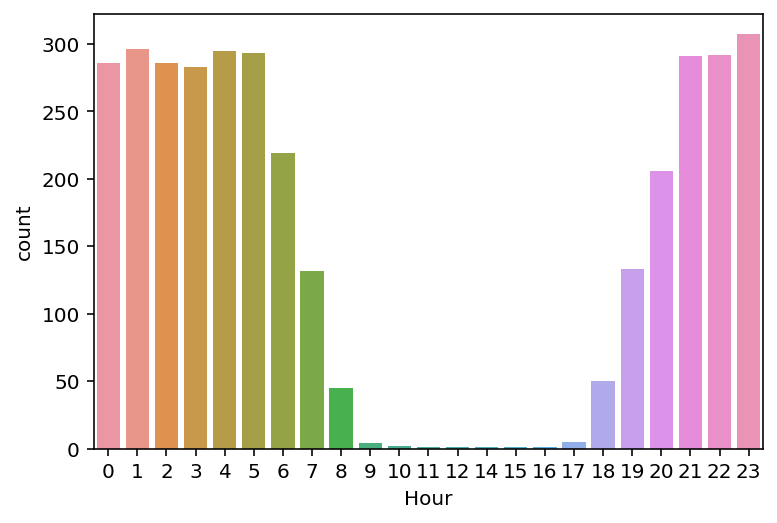

In [99]:
sns.countplot(x='Hour', data=cycle[cycle['Solar Radiation (MJ/m2)']==0])

#### 상관계수 행렬 히트맵

Text(0.5, 1.0, 'correlation heatmap')

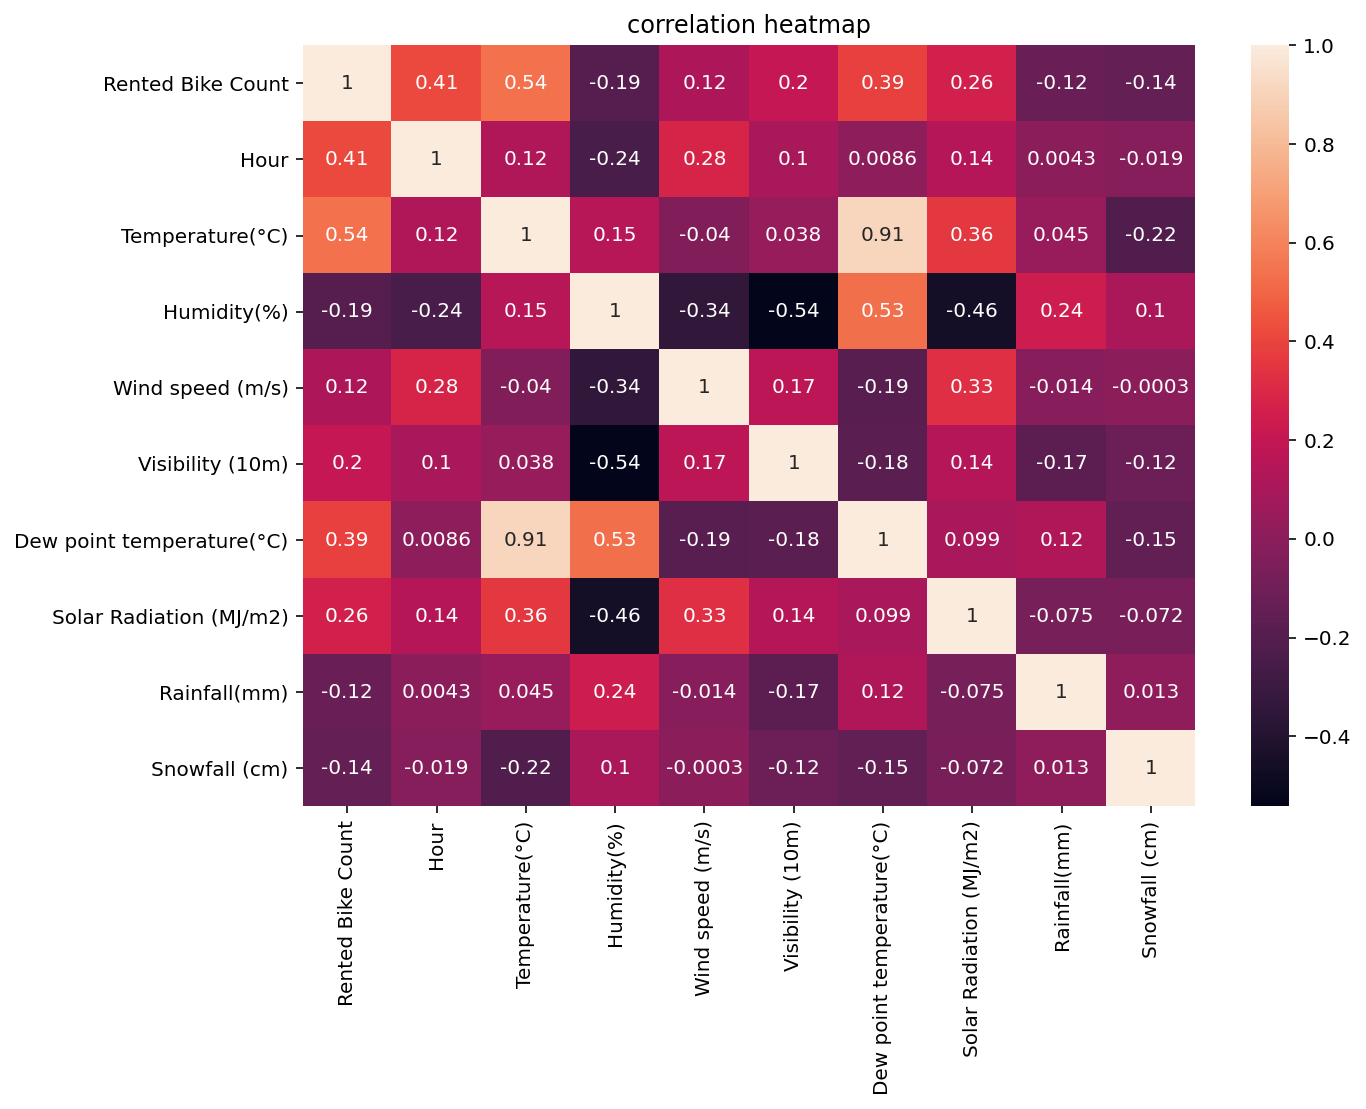

In [100]:
plt.figure(figsize=(10,7))  #사이즈 조정
sns.heatmap(cycle[['Date','Rented Bike Count','Hour','Temperature(°C)','Humidity(%)','Wind speed (m/s)','Visibility (10m)','Dew point temperature(°C)','Solar Radiation (MJ/m2)','Rainfall(mm)','Snowfall (cm)']].corr(),annot=True) #annot는 값  표기
plt.title('correlation heatmap') #상관계수 행렬 히트맵

#### -> 상관계수는 기온과 대여량, 이슬점과 습도, 대여 시각과 대여량, 이슬점과 대여량, 기온과 태양 복사열, 바람 세기와 태양 복사열 순으로 크다.
- 기온이 너무 높거나 너무 낮을 경우 자전거를 타는 사람이 많지 않을 것이다. (기온과 대여량)
- 습도는 공기 중에 포함된 수증기량을, 이슬점은 공기 중의 수증기가 응결되어 이슬로 변하기 시작하는 온도를 나타낸다. 이슬점이 높을수록 습도가 높다는 것을 의미한다. (이슬점과 습도)
- 시야 확보가 잘 되지 않는 밤 시간대 보다는 낮 시간대에 자전거를 이용하는 사람이 많을 것이다. (대여 시각과 대여량)
- 이슬점이 높으면 습도가 높기 때문에 대여량이 줄어들 것임. (이슬점과 대여량) -> 습도와 대여량의 상관계수가 낮은 이유는 의문.
- 태양 복사열이 지구 대기와 지표면을 가열하여 기온을 상승시키기 때문에 관련성이 높다. (기온과 태양 복사열)
- 태양 복사열은 지표면을 가열하여 기온 차이를 발생시키고, 이는 기압 차이를 통해 바람을 발생시켜 바람 세기에 영향을 준다.(바람 세기와 태양 복사열)

#### -> 가시성과 습도, 태양 복사열과 습도, 바람 세기와 습도는 음의 상관계수를 갖으며 이 순서대로 작다.
- 앞이 보이는 것도 습도 간에는 관련성이 크지 않다.(가시성과 습도)
- 간접적으로 영향을 미칠 수 있지만 큰 관련성이 있진 않다. (태양 복사열과 습도)
- 바람 세기와 습도는 서로 영향을 미칠 것이라고 생각이 들어서 이 결과에 대해 이해하기 어렵다. 아무래도 이 데이터 내에서는 서로 관련이 없는 게 아닐까 추측해본다. (바람 세기와 습도)

# 5. 데이터 전처리하기

### 5-1 결측치, 이상치 처리하기

## Seasons
#### Seasons의 결측치를 무엇으로 대체하는 게 좋을지 데이터를 보며 알아보자.

#### 날짜와 시간을 오름차순에 따라 데이터 정리

In [101]:
cycle['Date']=pd.to_datetime(cycle['Date'],dayfirst=True)
cycle=cycle.sort_values(by=['Date','Hour'])
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1466,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,NaN,No Holiday,Yes
2598,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
613,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2442,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5312,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
3741,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
2898,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,NaN,No Holiday,Yes
6733,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


#### -> 계절 데이터에 결측치가 있으므로 3,4,5월은 봄, 6,7,8월은 여름, 9,10,11월은 가을, 12,1,2월은 겨울로 다시 설정.

In [102]:
def change(date):
    if date.month in [3, 4, 5]:
        return 'Spring'
    elif date.month in [6, 7, 8]:
        return 'Summer'
    elif date.month in [9, 10, 11]:
        return 'Autumn'
    elif date.month in [12, 1, 2]:
        return 'Winter'
    else:
        return 'N'
cycle['Seasons']=cycle['Date'].apply(lambda x : change(x))
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
1466,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2598,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
613,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
2442,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5312,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
3741,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
2898,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
6733,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


#### Index 깔끔하게 하게 위해서 0부터 7007까지로 수정

In [103]:
cycle.index=np.arange(7008)
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes


In [104]:
print(cycle['Seasons'].isna().sum())

0


#### -> Seasons 결측치 대체 끝!

### + 추가로 월 별 데이터를 보기 위해 'Month' 열을 추가하자

In [105]:
cycle['Month']=cycle['Date'].dt.month
cycle.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12


### + 추가로 요일 별 데이터를 보기 위해 'Day Of Week' 열을 추가하자

In [106]:
cycle['Day Of Week']=cycle['Date'].dt.day_name()
cycle.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,Friday


In [158]:
day_order =['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
cycle.loc[:,'Day Of Week'] = pd.Categorical(cycle['Day Of Week'], categories=day_order, ordered=True) # 범주형 데이터로 변환

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


## Temperature(°C)
#### Temperature(°C)의 결측치를 무엇으로 대체하는 게 좋을지 데이터를 보며 알아보자.

In [108]:
cycle[cycle['Temperature(°C)'].isna()]

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day Of Week
6,2017-12-01,181,6,NaN,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
8,2017-12-01,930,8,NaN,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes,12,Friday
20,2017-12-01,405,21,NaN,81,0.8,1687,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
21,2017-12-01,398,22,NaN,83,1.5,1380,-3.4,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
22,2017-12-01,323,23,NaN,84,NaN,1265,-3.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6962,2018-11-28,675,14,NaN,14,1.1,1880,-16.1,1.70,0.0,0.0,Autumn,No Holiday,Yes,11,Wednesday
6981,2018-11-29,645,13,NaN,26,2.1,1604,-12.7,0.21,0.0,0.0,Autumn,No Holiday,Yes,11,Thursday
6986,2018-11-29,1577,18,NaN,46,0.9,1566,-4.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Thursday
6988,2018-11-29,559,23,NaN,56,1.9,1394,-5.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Thursday


기온은 다른 독립 변수 중 이슬점과 가장 큰 상관계수를 갖고 있었기 때문에 태양 복사열과 연관지어 보자.

In [109]:
cycle[['Temperature(°C)','Dew point temperature(°C)']]

,Temperature(°C),Dew point temperature(°C)
0,-5.2,-17.6
1,-5.5,-17.6
2,-6.0,-17.7
3,-6.2,-17.6
4,-6.0,-18.6
...,...,...
7003,6.0,-10.7
7004,4.7,-9.8
7005,4.2,-10.3
7006,2.6,-9.9


Dew point temperature(°C)의 값을 10개의 구간으로 나눈 후 그 구간별 Temperature(°C)의 평균값을 계산하고, 이 값으로 Temperature(°C)의 NaN 값을 대체하자.

In [110]:
#이슬점 구간 나누기
bins = np.linspace(cycle['Dew point temperature(°C)'].min(), cycle['Dew point temperature(°C)'].max(), 11)
cycle['Dew point temperature(°C) Binned'] = pd.cut(cycle['Dew point temperature(°C)'], bins)

# 구간별 Temperature(°C)의 평균값 계산
temperature_means = cycle.groupby('Dew point temperature(°C)')['Temperature(°C)'].mean()

# 각 구간별 평균값을 딕셔너리로 변환
temperature_means_dict = temperature_means.to_dict()

# NaN 값을 구간별 평균값으로 대체하는 함수 정의
def fill_temperature(row):
    if pd.isna(row['Temperature(°C)']):
        binned_value = row['Dew point temperature(°C)']
        return temperature_means_dict.get(binned_value, row['Temperature(°C)'])
    return row['Temperature(°C)']

# NaN 값을 대체
cycle['Temperature(°C)'] = cycle.apply(fill_temperature, axis=1)

# 결과 확인
print(cycle['Temperature(°C)'].isna().sum())

# Dew point temperature(°C) Binned 열 삭제
cycle.drop('Dew point temperature(°C) Binned',axis=1,inplace=True)

6


In [111]:
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
4,2017-12-01,78,4,-6.0,36,NaN,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday


#### 나머지 6개의 결측치는 월별 평균 기온으로 대체하겠다.

In [112]:
month_temperature_means = cycle.groupby('Month')['Temperature(°C)'].transform('mean')
cycle['Temperature(°C)'].fillna(month_temperature_means, inplace=True)
#결과 확인
print(cycle['Temperature(°C)'].isna().sum())

0


#### -> Temperature(°C) 결측치 대체 끝!

## Wind speed (m/s) 
#### Wind speed (m/s)의 결측치를 무엇으로 대체하는 게 좋을지 데이터를 보며 알아보자.

In [113]:
wind_na=cycle[cycle['Wind speed (m/s)'].isna()==True]

#### 계절에 따라 살펴보자.
- 계절이 구별기준이 되기엔 부족한 듯하다.

<AxesSubplot:xlabel='Seasons', ylabel='count'>

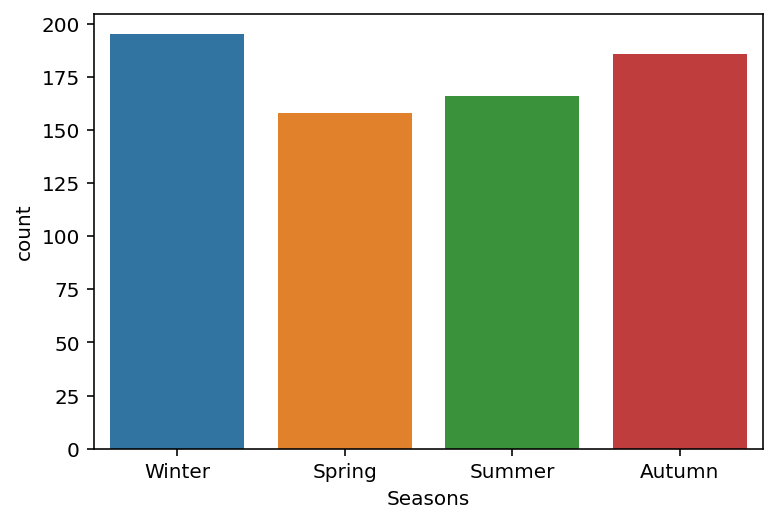

In [114]:
sns.countplot(x='Seasons',data=wind_na)

### 선형 보간법으로 풍속 데이터의 결측치를 대체할 것이다.
- 풍속 데이터가 다른 열의 데이터들과 큰 상관계수를 갖고 있지 않기 때문에.
- 풍속은 연속성이 있는 데이터이기 때문에 시간의 흐름과 큰 관련이 있을 것이라고 생각하기 때문에.

In [115]:
cycle['Wind speed (m/s)']=cycle['Wind speed (m/s)'].interpolate(method='linear')
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
4,2017-12-01,78,4,-6.0,36,1.2,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,2018-11-30,1047,17,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
7004,2018-11-30,1384,18,4.7,34,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
7005,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
7006,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday


## Humidity(%) 

#### 위에서 말했듯이 가 0인 데이터들을 이상치로 판단하여, 모두 NaN값으로 대체한 후 선형 보간법으로 결측치들을 대체할 것이다

In [116]:
cycle.loc[cycle['Humidity(%)'] == 0, 'Humidity(%)'] = np.nan

In [117]:
cycle['Humidity(%)']=cycle['Humidity(%)'].interpolate(method='linear')

## Functioning Day
- 'Yes'인 경우에만 자전거를 이용할 수 있음.

<AxesSubplot:xlabel='Functioning Day', ylabel='Rented Bike Count'>

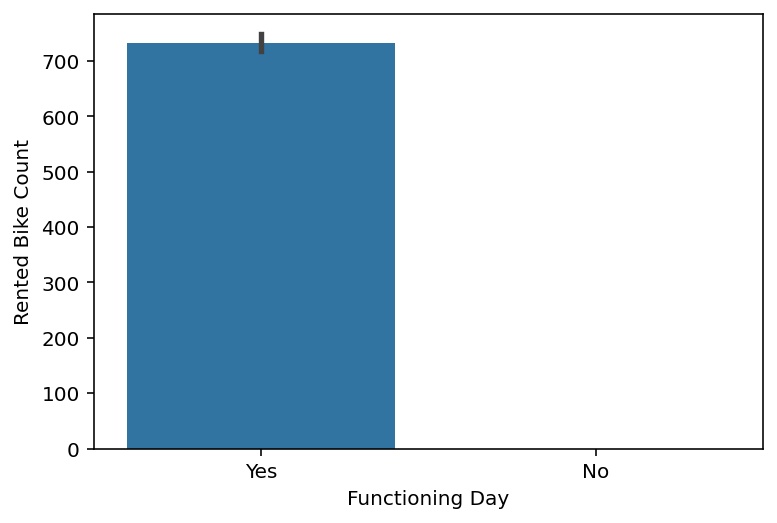

In [118]:
sns.barplot(x='Functioning Day',y='Rented Bike Count',data=cycle)

#### 어떠한 이유로 기능 불가능한 날이 생긴걸까?

In [119]:
cycle.groupby(cycle[cycle['Functioning Day']=='No']['Date']).size()

Date
2018-04-11    20
2018-05-10    21
2018-09-18    21
2018-09-19    20
2018-09-28    18
2018-09-30    18
2018-10-02    18
2018-10-04    19
2018-10-06     6
2018-10-09    19
2018-11-03    20
2018-11-06    17
2018-11-09    19
dtype: int64

- 전산 기능이 잘 사용되지 못한 날을 기능 가능날의 'No'로 지정했을 수 있다.
- 2018년에만 13번의 기능 불가능날이 존재하는 것으로 보아 2018년부터 정책이 바뀌면서 자전거 수리를 한 날들일 수 있다.

#### -> 'No'인 경우에는 대여량이 측정되어있지 않기 때문에 'No'인 열은 지우도록 하겠다. 

In [120]:
cycle = cycle.loc[cycle['Functioning Day'] == 'Yes']

## 박스플롯으로 이상치 확인하기

#### Rented Bike Count

<AxesSubplot:>

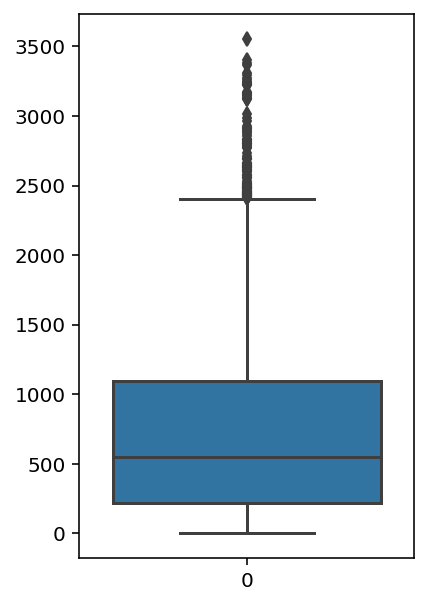

In [121]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Rented Bike Count'])

In [180]:
Q1 = cycle['Rented Bike Count'].quantile(0.25)
Q3 = cycle['Rented Bike Count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cycle[cycle['Rented Bike Count']>=upper_bound] # 이상치 데이터 살펴보기

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day Of Week
2598,2018-04-16,2692,18,17.0,28.0,3.100,2000,-1.6,0.88,0.0,0.0,Spring,No Holiday,Yes,4,Monday
2767,2018-04-25,2807,18,21.2,32.0,3.800,1927,3.8,0.94,0.0,0.0,Spring,No Holiday,Yes,4,Wednesday
2789,2018-04-26,2574,18,17.4,45.0,3.125,1092,5.3,0.75,0.0,0.0,Spring,No Holiday,Yes,4,Thursday
2807,2018-04-27,2577,18,20.3,47.0,2.500,705,8.6,0.77,0.0,0.0,Spring,No Holiday,Yes,4,Friday
2866,2018-04-30,2558,18,23.0,54.0,2.900,679,13.1,0.81,0.0,0.0,Spring,No Holiday,Yes,4,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,2018-10-17,2445,18,14.6,39.0,2.300,2000,0.7,0.11,0.0,0.0,Autumn,No Holiday,Yes,10,Wednesday
6009,2018-10-19,2631,18,16.6,40.0,2.400,2000,2.9,0.11,0.0,0.0,Autumn,No Holiday,Yes,10,Friday
6085,2018-10-23,2415,18,14.5,71.0,2.100,1235,9.2,0.06,0.0,0.0,Autumn,No Holiday,Yes,10,Tuesday
6103,2018-10-24,2612,18,15.1,53.0,2.050,2000,5.5,0.06,0.0,0.0,Autumn,No Holiday,Yes,10,Wednesday


In [181]:
cycle[cycle['Rented Bike Count']>=upper_bound]['Hour'].value_counts() #그 중 Hour에 집중하여 살펴보기

18    62
19    30
20    12
17     4
21     3
8      2
16     2
Name: Hour, dtype: int64

-> 출퇴근 시간이 대부분을 차지했는데 출퇴근 길에는 대여량이 많을 수 밖에 없기 때문에 이 데이터 값들은 이상치라고 생각하지 않을 것이다.

#### Hour

<AxesSubplot:>

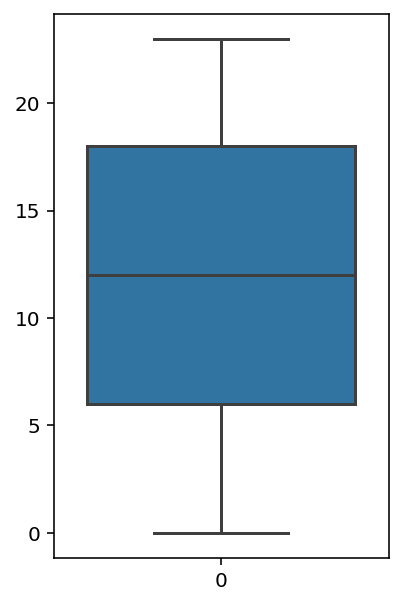

In [122]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Hour'])

-> 깔끔하다

#### Temperature(°C)

<AxesSubplot:>

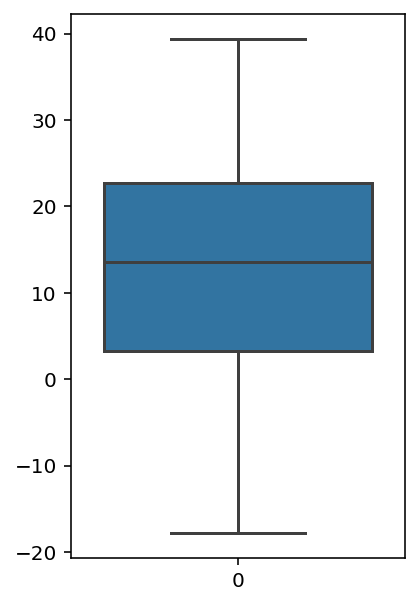

In [123]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Temperature(°C)'])

-> 깔끔하다

#### Humidity(%)

<AxesSubplot:>

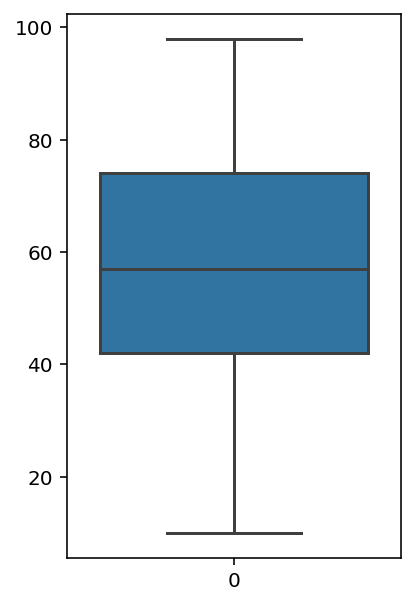

In [124]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Humidity(%)'])

-> 깔끔하다

#### Wind speed (m/s)

<AxesSubplot:>

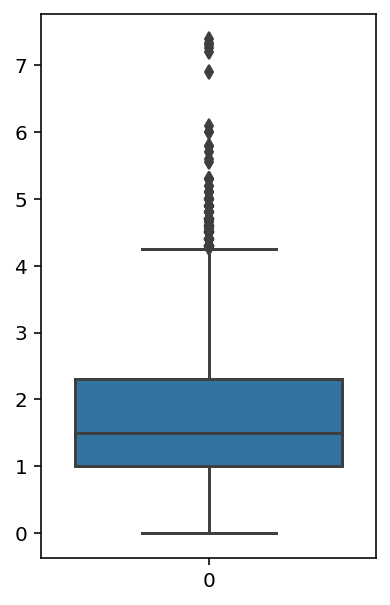

In [183]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Wind speed (m/s)'])

In [189]:
Q1 = cycle['Wind speed (m/s)'].quantile(0.25)
Q3 = cycle['Wind speed (m/s)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cycle[cycle['Wind speed (m/s)']>=upper_bound] #이상치 데이터 살펴보기

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day Of Week
71,2017-12-04,393,12,-0.300000,38.0,4.80,1823,-12.9,1.11,0.0,0.0,Winter,No Holiday,Yes,12,Monday
72,2017-12-04,391,13,0.000000,30.0,4.65,1938,-15.5,1.17,0.0,0.0,Winter,No Holiday,Yes,12,Monday
73,2017-12-04,338,14,0.100000,27.0,4.50,2000,-16.7,1.09,0.0,0.0,Winter,No Holiday,Yes,12,Monday
74,2017-12-04,341,15,-0.100000,25.0,5.80,2000,-17.8,0.88,0.0,0.0,Winter,No Holiday,Yes,12,Monday
75,2017-12-04,375,16,-0.271429,23.0,5.55,2000,-18.8,0.55,0.0,0.0,Winter,No Holiday,Yes,12,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5849,2018-10-11,1000,13,4.737500,32.0,5.00,1990,-2.9,2.56,0.0,0.0,Autumn,No Holiday,Yes,10,Thursday
6153,2018-10-27,1118,13,10.600000,38.0,4.60,2000,-3.1,1.63,0.0,0.0,Autumn,No Holiday,Yes,10,Saturday
6154,2018-10-27,1183,14,10.800000,37.0,4.40,2000,-3.3,1.29,0.0,0.0,Autumn,No Holiday,Yes,10,Saturday
6157,2018-10-27,1176,17,9.500000,34.0,5.70,2000,-5.6,0.45,0.0,0.0,Autumn,No Holiday,Yes,10,Saturday


In [190]:
cycle[cycle['Wind speed (m/s)']>=upper_bound]['Date'].value_counts()

2018-04-10    9
2018-04-07    8
2017-12-04    8
2018-01-10    7
2018-03-01    6
2017-12-11    6
2018-09-05    5
2018-06-26    5
2018-02-10    5
2017-12-26    4
2018-01-09    4
2018-01-29    4
2018-10-27    3
2018-10-11    3
2018-04-12    3
2018-02-05    3
2018-02-03    3
2018-01-24    3
2018-04-06    3
2018-01-23    2
2018-10-01    2
2018-02-12    2
2018-02-06    2
2018-04-19    2
2018-02-22    2
2018-05-05    2
2017-12-10    2
2018-03-14    2
2017-12-24    2
2018-05-24    1
2017-12-16    1
2018-05-03    1
2018-03-20    1
2018-02-17    1
2018-09-22    1
2018-05-16    1
2018-10-29    1
2018-01-02    1
2018-04-17    1
2018-06-01    1
2018-01-28    1
2018-02-04    1
2018-08-05    1
2018-04-28    1
2018-03-28    1
2018-09-06    1
2017-12-25    1
2018-01-08    1
2018-02-15    1
2018-09-03    1
2018-08-21    1
2018-03-08    1
2018-03-10    1
2018-05-04    1
Name: Date, dtype: int64

-> 풍속의 이상치가 137개있다. 혹시 태풍의 영향이 있었는지 찾아보았을 때, 2017년에는 노루, 탈림, 다나스 등 7,8,9,10월 경에 태풍이 발생했고, 2018년에는 제비, 망쿳, 콩레이 등 8,9,10월 경에 태풍이 발생했다. 하지만 이상치들은 다양하게 골고루 퍼져있는 것으로 보아 태풍의 영향으로 인한 이상치는 아닌 듯하다.

#### Visibility (10m)

<AxesSubplot:>

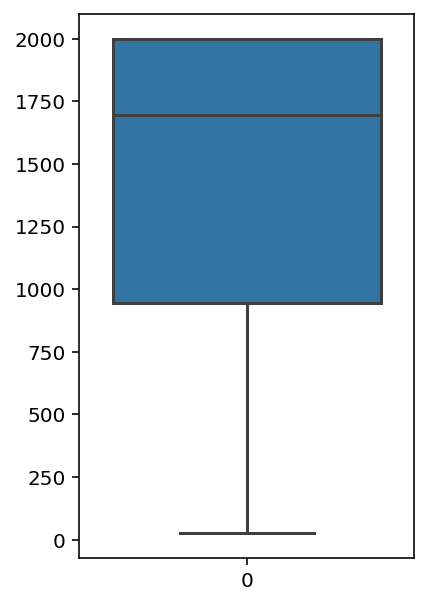

In [127]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Visibility (10m)'])

-> 깔끔하다

#### Dew point temperature(°C)

<AxesSubplot:>

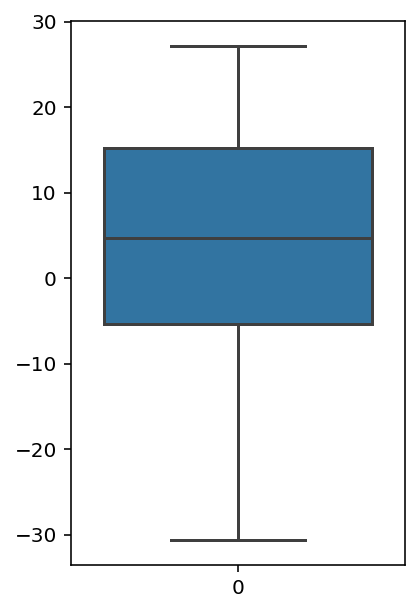

In [128]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Dew point temperature(°C)'])

-> 깔끔하다

#### Solar Radiation (MJ/m2)

<AxesSubplot:>

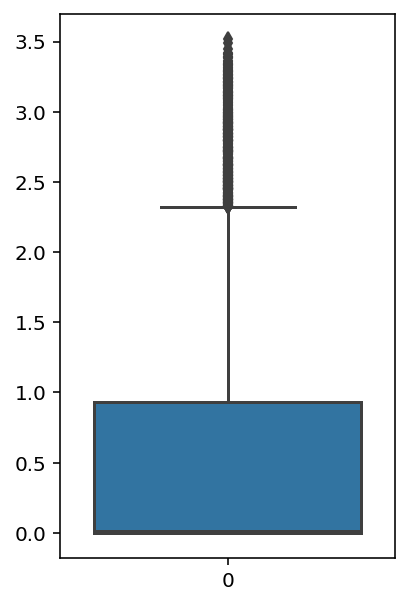

In [129]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Solar Radiation (MJ/m2)'])

In [162]:
Q1 = cycle['Solar Radiation (MJ/m2)'].quantile(0.25)
Q3 = cycle['Solar Radiation (MJ/m2)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cycle[cycle['Solar Radiation (MJ/m2)']>=upper_bound].shape[0] # 이상치의 개수

515

-> 태양복사열은 새벽시간에 없는 경우가 많기 때문에 이 박스플롯의 이상치를 이상치라고 생각하지 않도록 하겠다.

#### Rainfall(mm)

<AxesSubplot:>

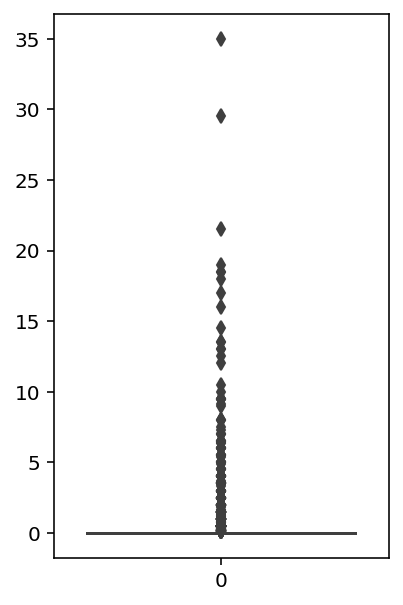

In [130]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Rainfall(mm)'])

In [163]:
Q1 = cycle['Rainfall(mm)'].quantile(0.25)
Q3 = cycle['Rainfall(mm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cycle[cycle['Rainfall(mm)']>=upper_bound].shape[0] # 이상치의 개수

6772

-> 강우량은 워낙 0인 데이터가 많기 때문에 박스플롯에서의 이상치를 이상치라고 볼 수 없다.

#### Snowfall (cm)

<AxesSubplot:>

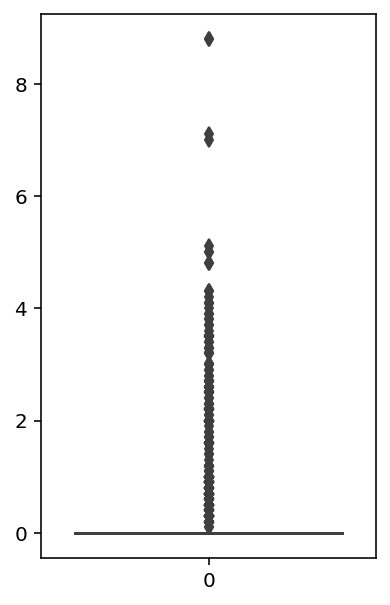

In [131]:
plt.figure(figsize=(3,5))
sns.boxplot(data=cycle['Snowfall (cm)'])

In [164]:
Q1 = cycle['Snowfall (cm)'].quantile(0.25)
Q3 = cycle['Snowfall (cm)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cycle[cycle['Snowfall (cm)']>=upper_bound].shape[0] # 이상치의 개수

6772

-> 적설량은 워낙 0인 데이터가 많기 때문에 박스플롯에서의 이상치를 이상치라고 볼 수 없다.

### 결국 박스플롯을 이용한 이상치 파악에서 제거하거나 대체할 만한 이상치는 찾지 못했다.

In [194]:
len(cycle.index) # 결측치 제거한 후의 행의 수

6772

In [195]:
cycle.index=np.arange(6772) # 인덱스 예쁘게 고치기

In [193]:
cycle

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Day Of Week
0,2017-12-01,254,0,-5.2,37.0,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
1,2017-12-01,204,1,-5.5,38.0,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
2,2017-12-01,173,2,-6.0,39.0,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
3,2017-12-01,107,3,-6.2,40.0,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
4,2017-12-01,78,4,-6.0,36.0,1.2,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes,12,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767,2018-11-30,1047,17,6.0,29.0,2.1,1877,-10.7,0.23,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
6768,2018-11-30,1384,18,4.7,34.0,1.9,1661,-9.8,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
6769,2018-11-30,1003,19,4.2,34.0,2.6,1894,-10.3,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday
6770,2018-11-30,694,21,2.6,39.0,0.3,1968,-9.9,0.00,0.0,0.0,Autumn,No Holiday,Yes,11,Friday


### 결측치 대체 결과 확인

In [196]:
print(cycle.isna().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Month                        0
Day Of Week                  0
dtype: int64


-> 성공!

# 6. 변수들 간의 그래프

### 6-1. Date & Rented Bike Count

#### ->이 두 변수들의 그래프로 뭔가 알아내기보다는 날짜와 관련된 계절, 월별 데이터 등으로 알아보는 것이 좋을 것 같다.

### 6-2. Hour & Rented Bike Count
- 8시와 18시 부근이 눈에 띈다. 직장인들의 출근 시간과 퇴근시간이기 때문에 많은 이용수를 보인다는 걸 알 수 있다.

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

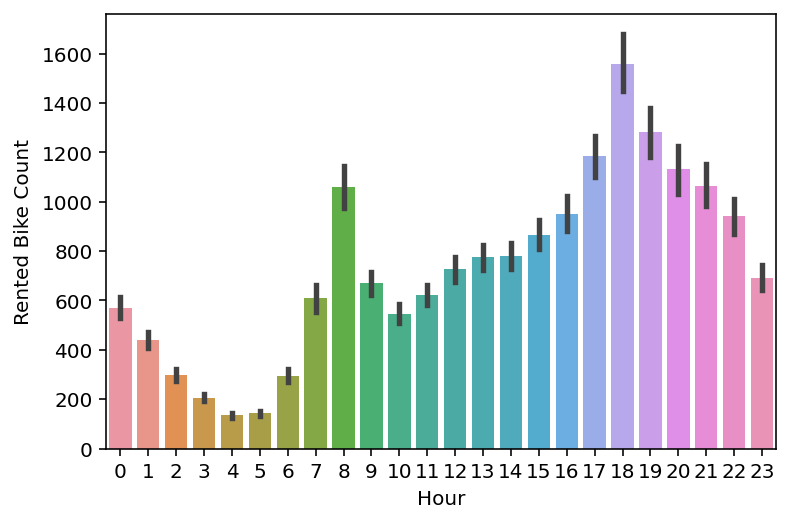

In [136]:
sns.barplot(x='Hour',y='Rented Bike Count',data=cycle)

### 6-3. Temperature(°C) & Rented Bike Count

- 20~30도에서 대여량이 높다는 것을 알 수 있다. (이 정도 기온이 자전거 타기 좋은 기온이지 않을까싶다.)
- 35도를 넘어가서도 대여량이 꽤 많은데 이 점은 다른 변수들과 엮어 알아보자.

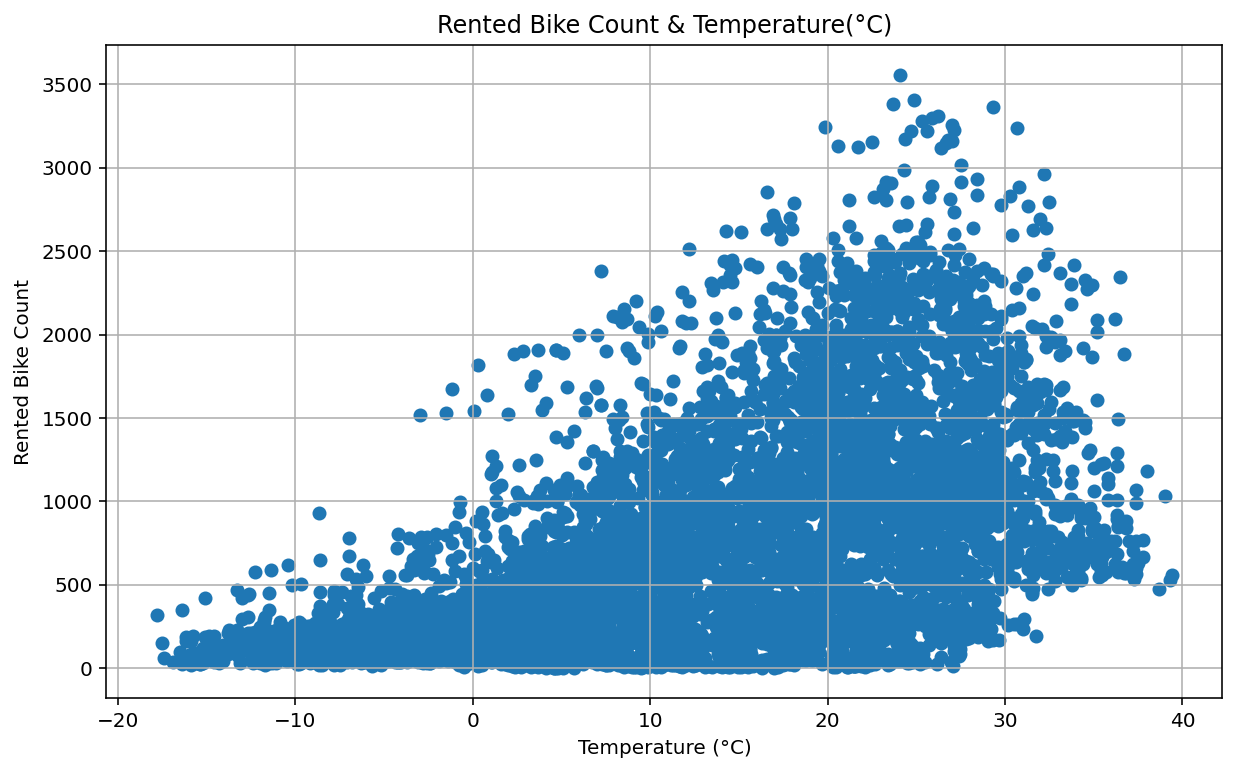

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Temperature(°C)'], cycle['Rented Bike Count'])
plt.title('Rented Bike Count & Temperature(°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

In [208]:
cycle[cycle['Temperature(°C)']>35]['Date'].value_counts()

2018-07-31    6
2018-07-30    6
2018-08-02    6
2018-07-22    6
2018-08-22    6
2018-07-29    5
2018-08-03    5
2018-08-01    5
2018-07-21    4
2018-08-14    4
2018-08-15    3
2018-08-10    3
2018-08-11    2
2018-08-07    1
2018-08-08    1
2018-07-27    1
2018-07-23    1
2018-08-16    1
2018-07-24    1
Name: Date, dtype: int64

-> 7월 중순부터 8월 중순까지 35도가 넘는 높은 온도가 계속해서 유지되었고 그 기간동안 자전거를 안 탈 수 없는 사람들이 탄 것 같다.

#### + 계절별로 기온에 따른 대여량을 알아보자.

#### 봄

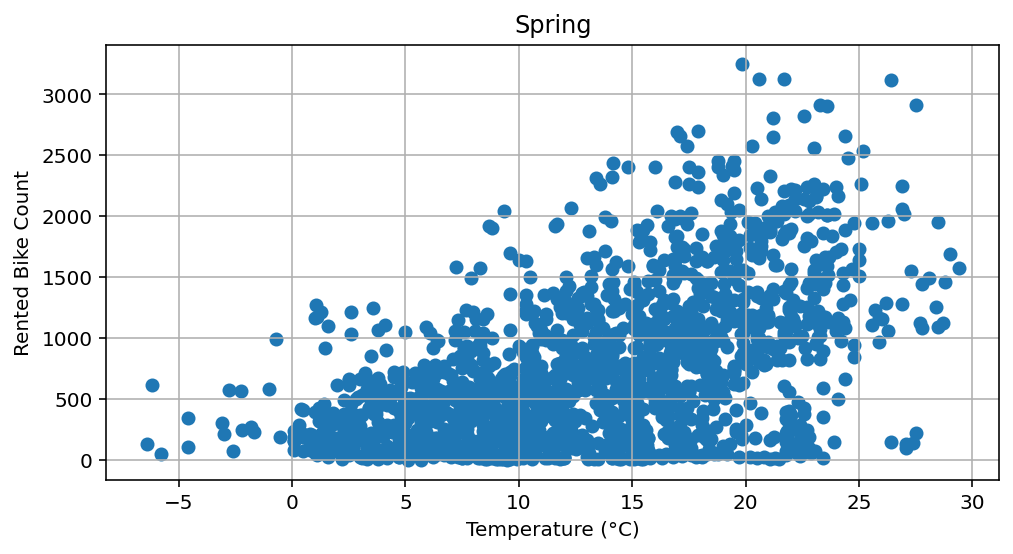

In [216]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Spring']['Temperature(°C)'], cycle[cycle['Seasons']=='Spring']['Rented Bike Count'])
plt.title('Spring')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 0도 부터 25도에 밀집되어있다.

#### 여름

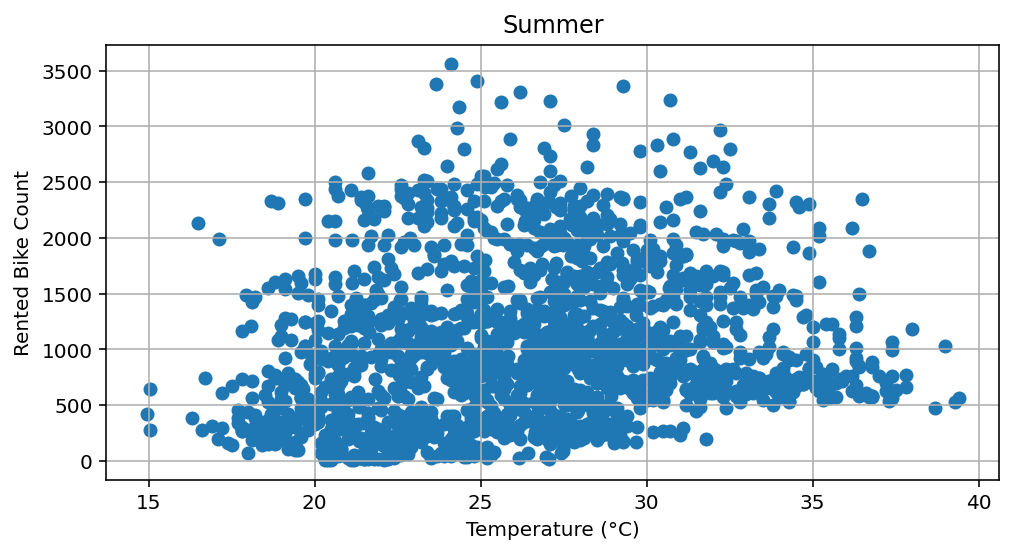

In [217]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Summer']['Temperature(°C)'], cycle[cycle['Seasons']=='Summer']['Rented Bike Count'])
plt.title('Summer')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 15도 부터 35도에 밀집되어있다.

#### 가을

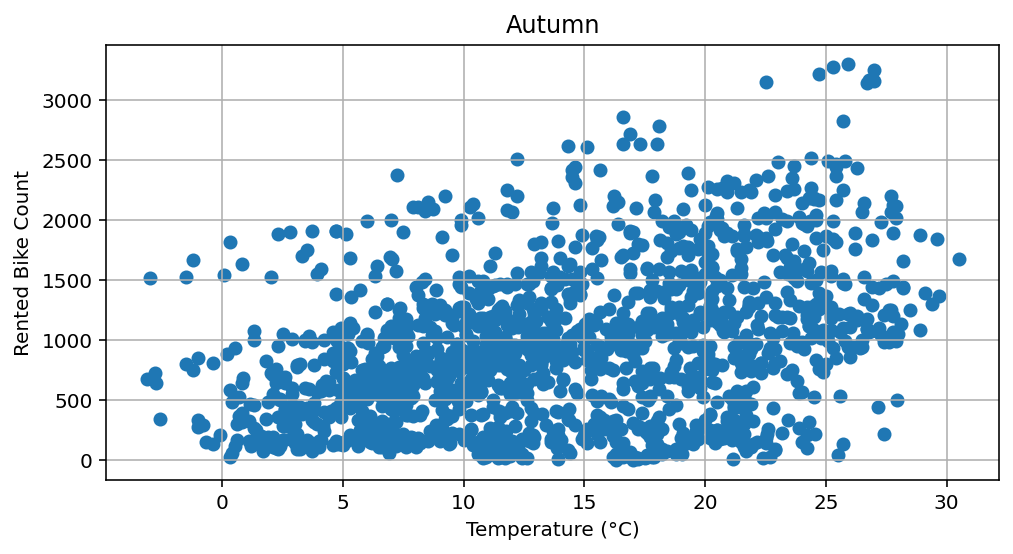

In [218]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Autumn']['Temperature(°C)'], cycle[cycle['Seasons']=='Autumn']['Rented Bike Count'])
plt.title('Autumn')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 0도 부터 27도에 밀집되어있다.

#### 겨울

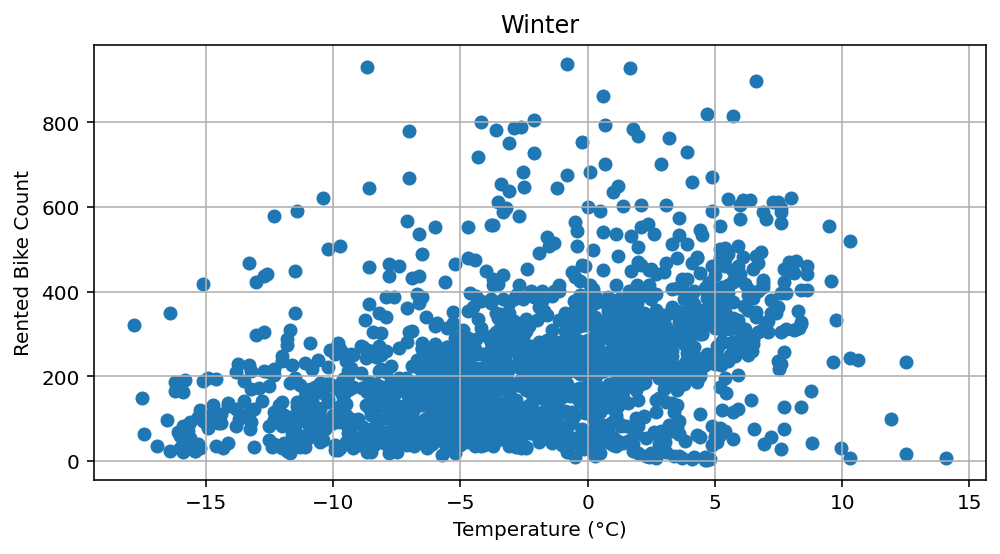

In [222]:
plt.figure(figsize=(8, 4))
plt.scatter(cycle[cycle['Seasons']=='Winter']['Temperature(°C)'], cycle[cycle['Seasons']=='Winter']['Rented Bike Count'])
plt.title('Winter')
plt.xlabel('Temperature (°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 대략 -15도 부터 10도에 밀집되어있다.

#### 6-4. Humidity(%) & Rented Bike Count

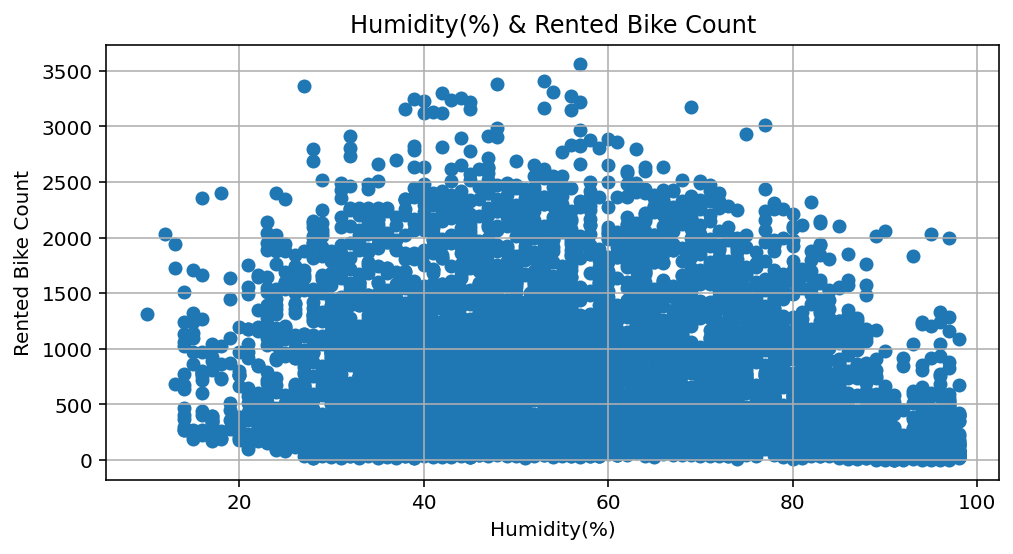

In [267]:
plt.figure(figsize=(8,4))
plt.scatter(cycle['Humidity(%)'], cycle['Rented Bike Count'])
plt.title('Humidity(%) & Rented Bike Count')
plt.xlabel('Humidity(%)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

#### + Humidity(%) & Dew point temperature(°C)

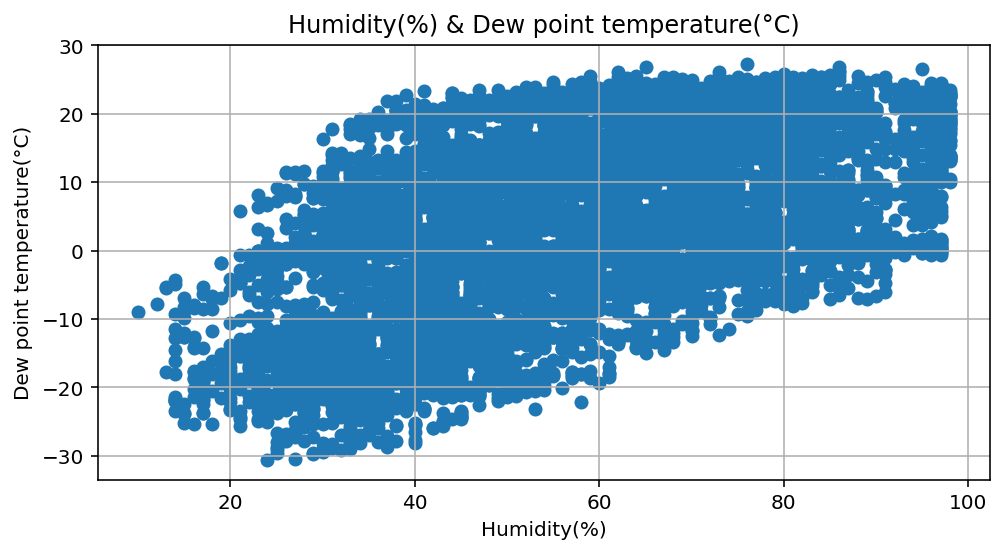

In [234]:
plt.figure(figsize=(8,4))
plt.scatter(cycle['Humidity(%)'], cycle['Dew point temperature(°C)'])
plt.title('Humidity(%) & Dew point temperature(°C)')
plt.xlabel('Humidity(%)')
plt.ylabel('Dew point temperature(°C)')
plt.grid(True)
plt.show()

#### 6-5. Wind speed (m/s) & Rented Bike Count

- 4m/s이상으로 풍속이 커지게 되면 대여량이 줄어드는 것을 알 수 있다. (바람을 뚫고 자전거를 타는 것은 4m/s 이상부터는 힘든 듯하다.)

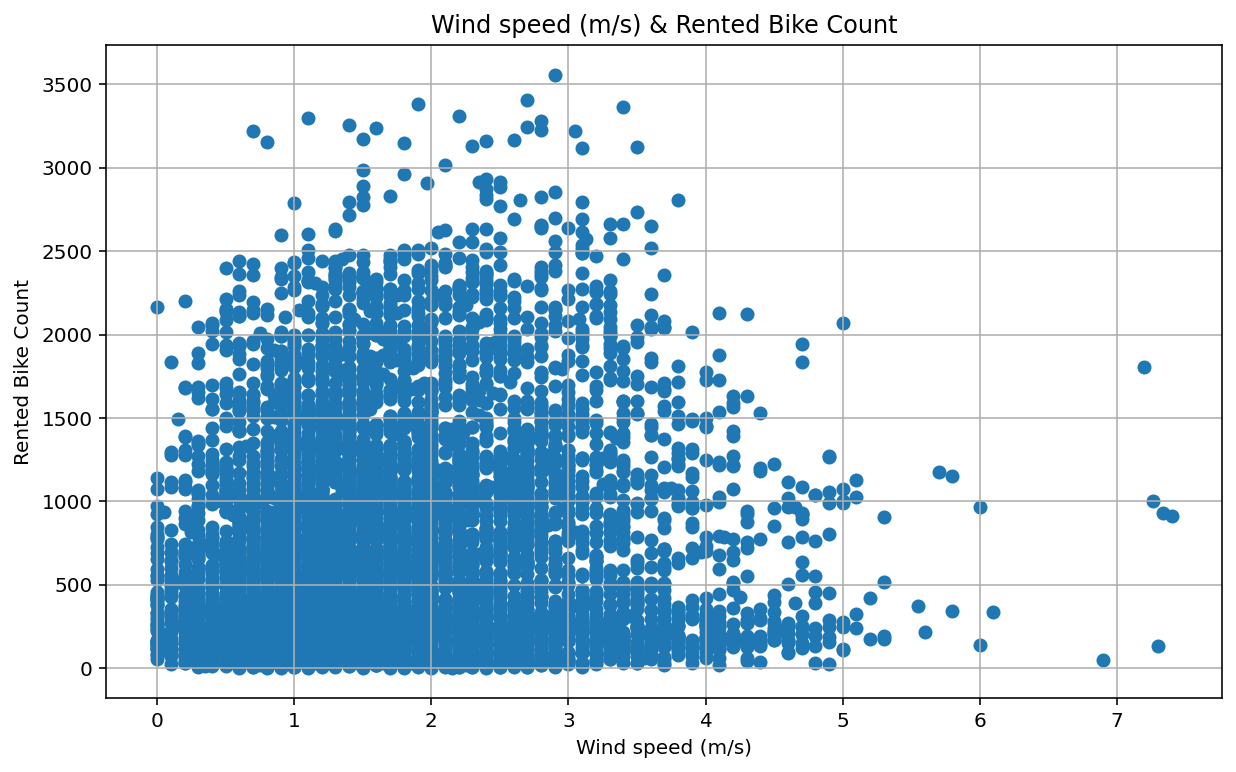

In [235]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Wind speed (m/s)'], cycle['Rented Bike Count'])
plt.title('Wind speed (m/s) & Rented Bike Count')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

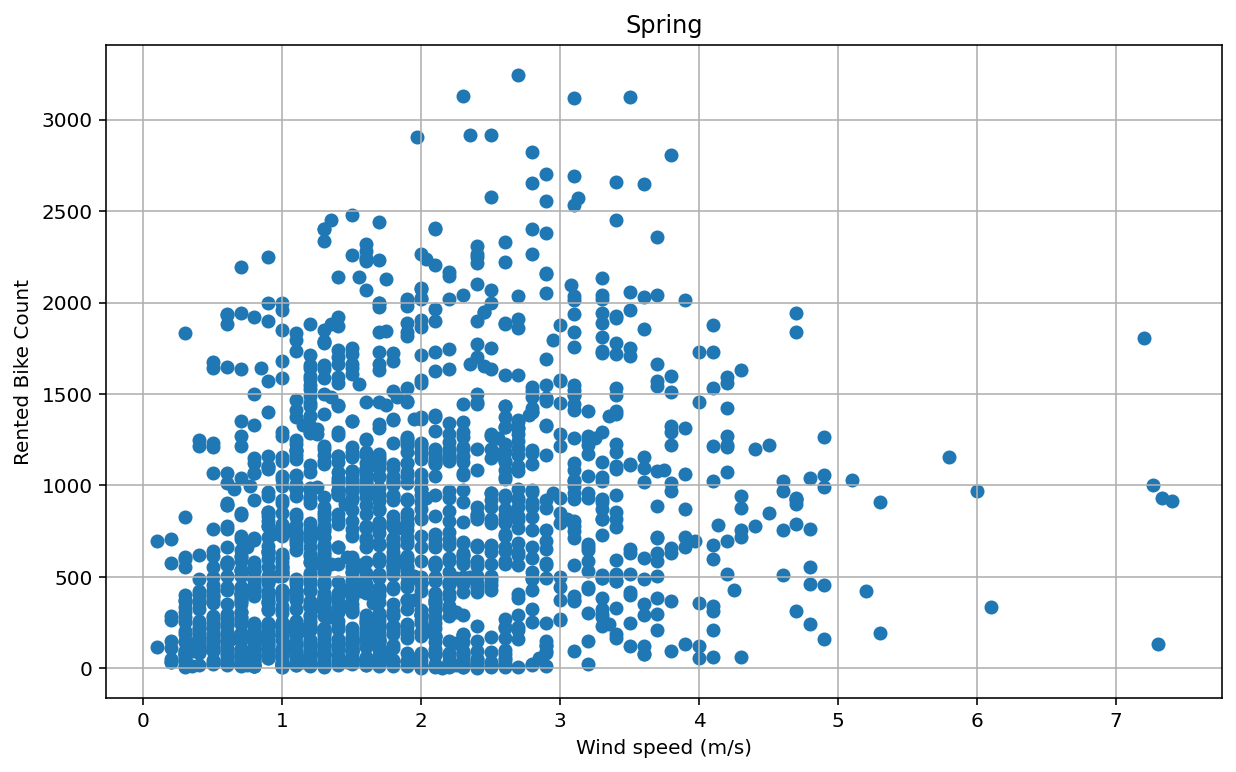

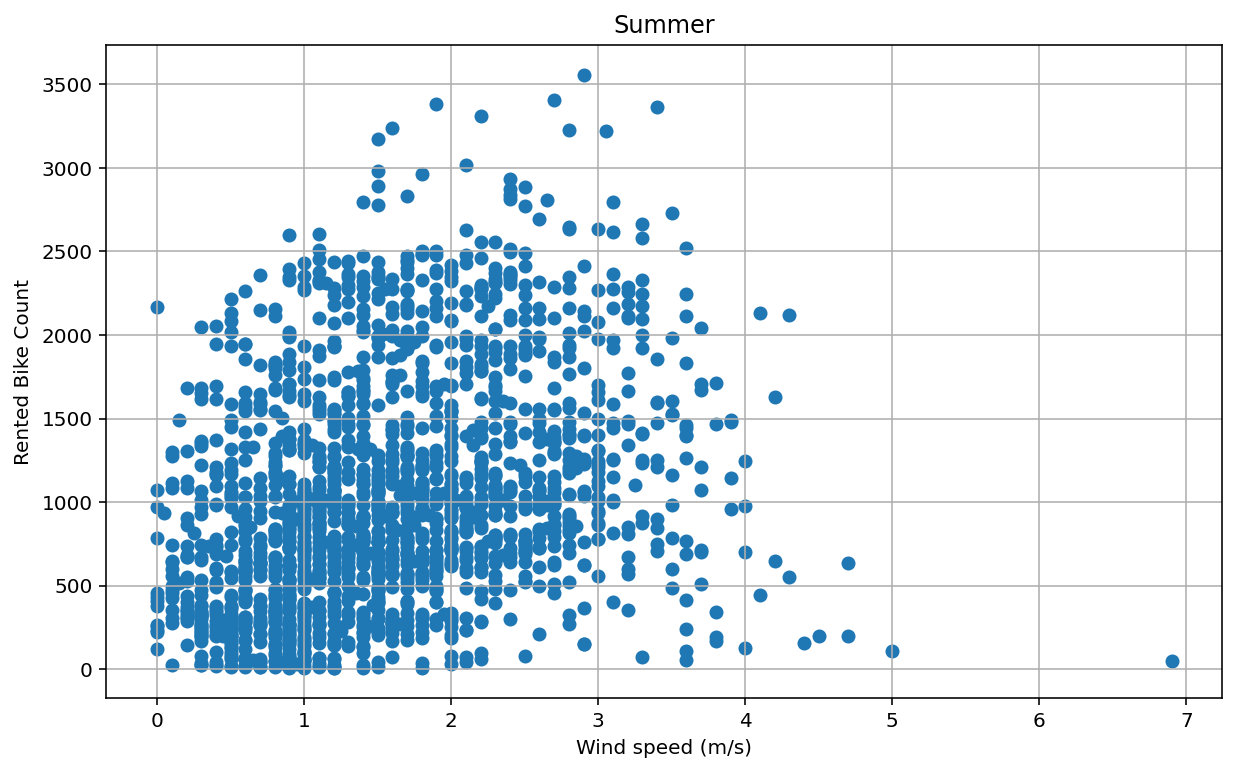

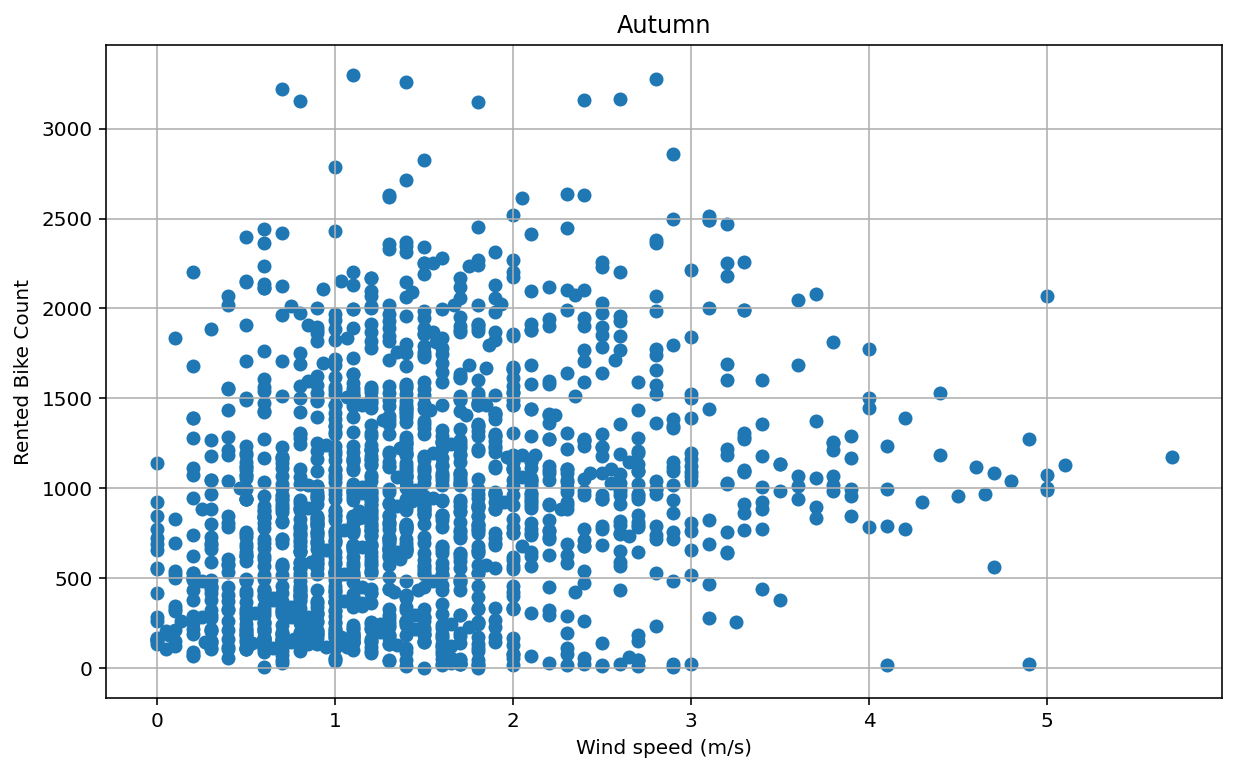

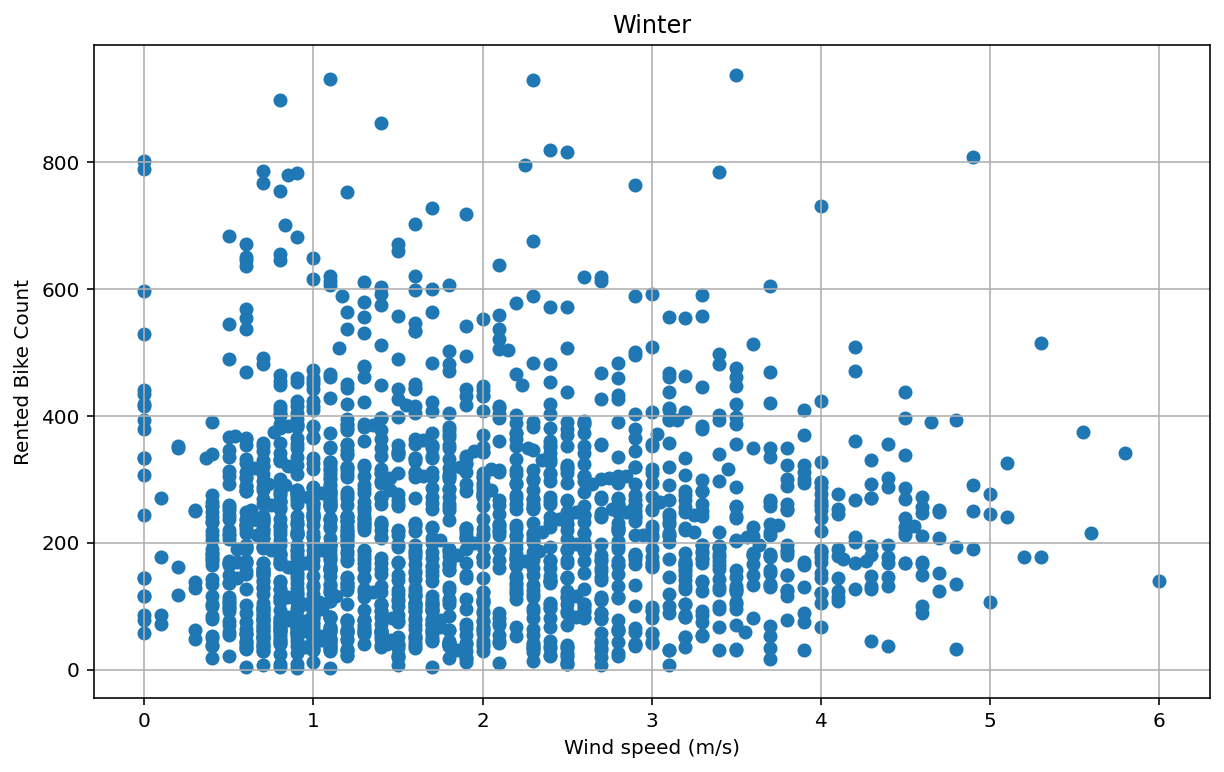

In [236]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Spring']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Spring']['Rented Bike Count'])
plt.title('Spring')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Summer']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Summer']['Rented Bike Count'])
plt.title('Summer')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Autumn']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Autumn']['Rented Bike Count'])
plt.title('Autumn')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(cycle[cycle['Seasons']=='Winter']['Wind speed (m/s)'], cycle[cycle['Seasons']=='Winter']['Rented Bike Count'])
plt.title('Winter')
plt.xlabel('Wind speed (m/s)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 계절별 풍속에 따른 대여량에 특별한 특징이 보이진 않는다.

#### 6-6. Visibility (10m) & Rented Bike Count

- 시야 확보가 많이 될수록 자전거 대여량이 늘어난다. 

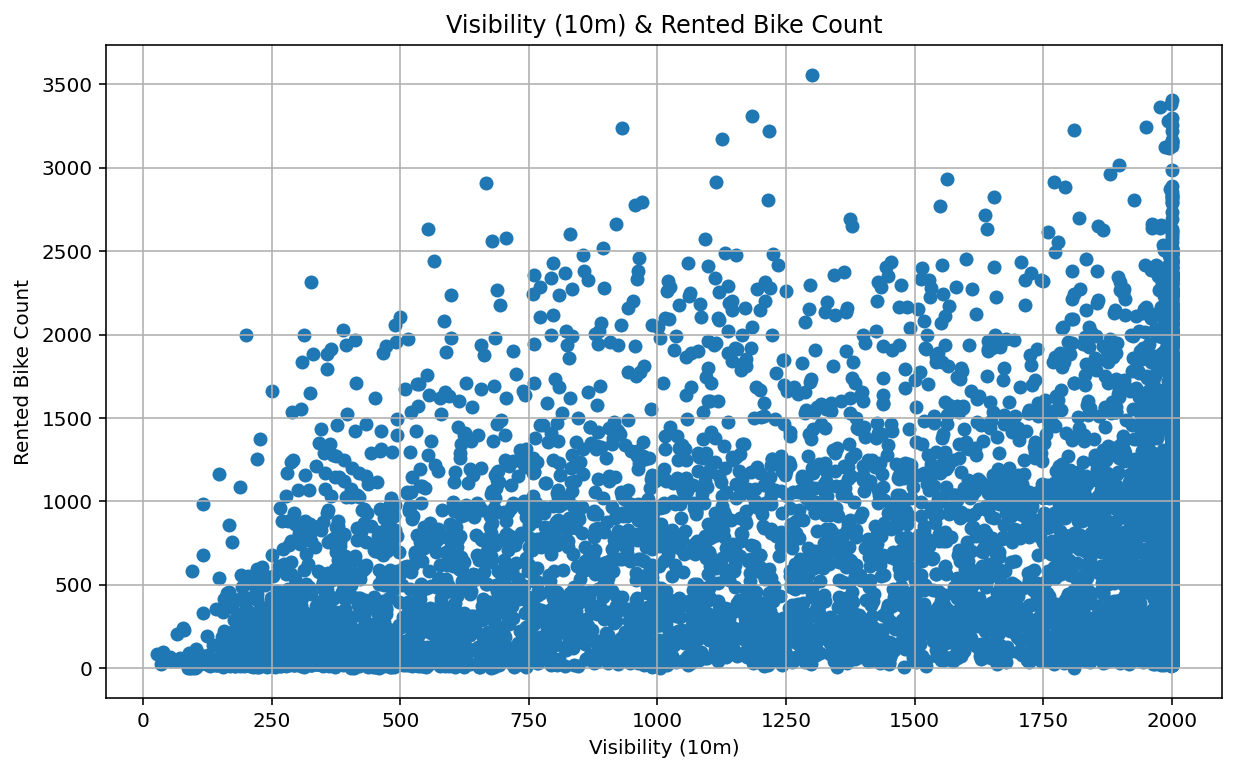

In [237]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Visibility (10m)'], cycle['Rented Bike Count'])
plt.title('Visibility (10m) & Rented Bike Count')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

#### 비와 눈이 오지 않을 때 vs 비 또는 눈이 올 때

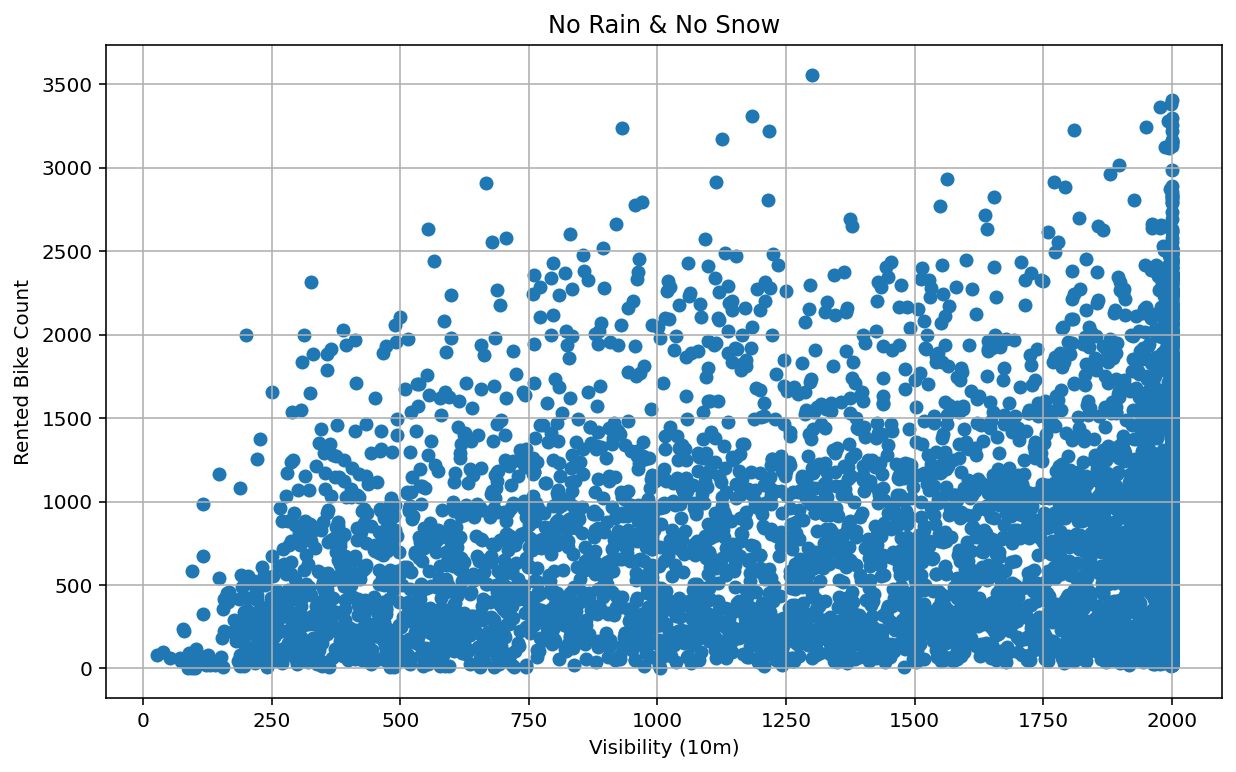

In [240]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Visibility (10m)'], cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Rented Bike Count'])
plt.title('No Rain & No Snow')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

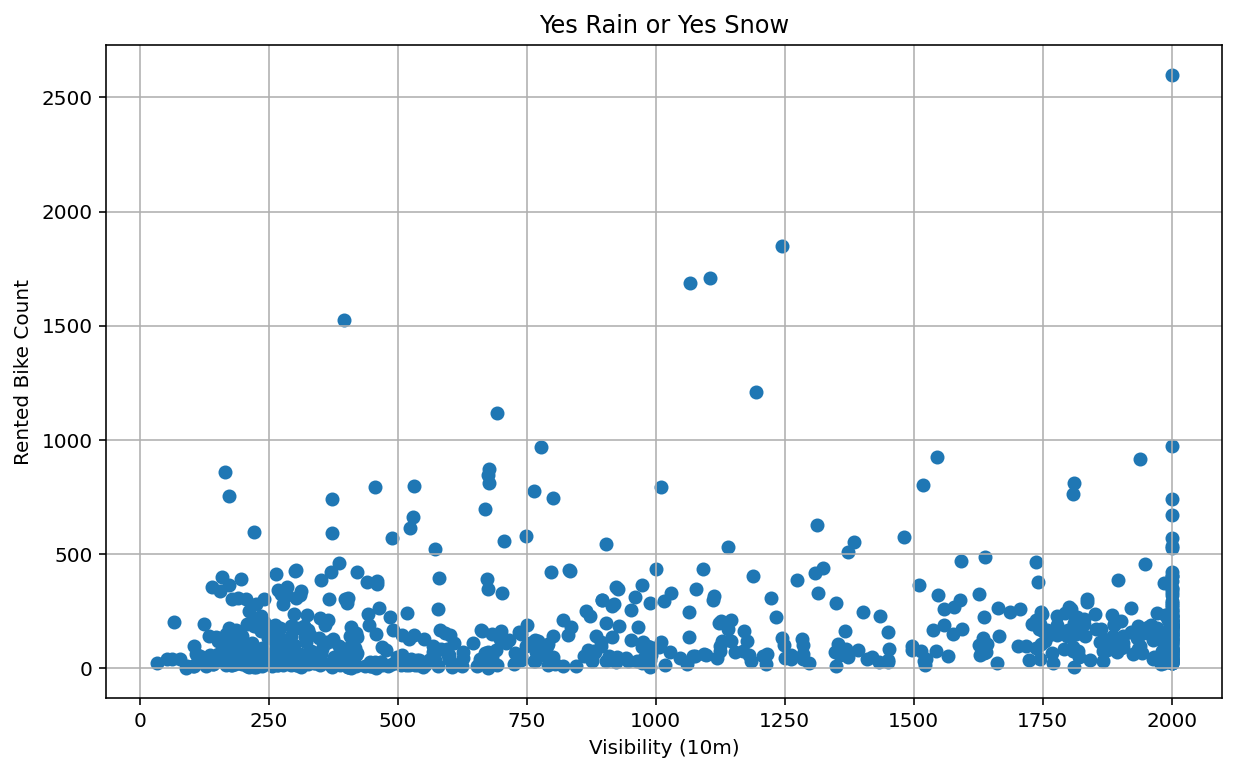

In [242]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Visibility (10m)'], cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Rented Bike Count'])
plt.title('Yes Rain or Yes Snow')
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 비와 눈 모두 안 올 때가 최대 대여량도 높고 전체적인 대여량도 높다. 비나 눈이 올 경우 시야확보가 안되기 때문에 대여량이 줄 것이라는 기대가 있었지만 그렇지는 않은 듯 하다.

#### 6-7. Dew point temperature(°C) & Rented Bike Count

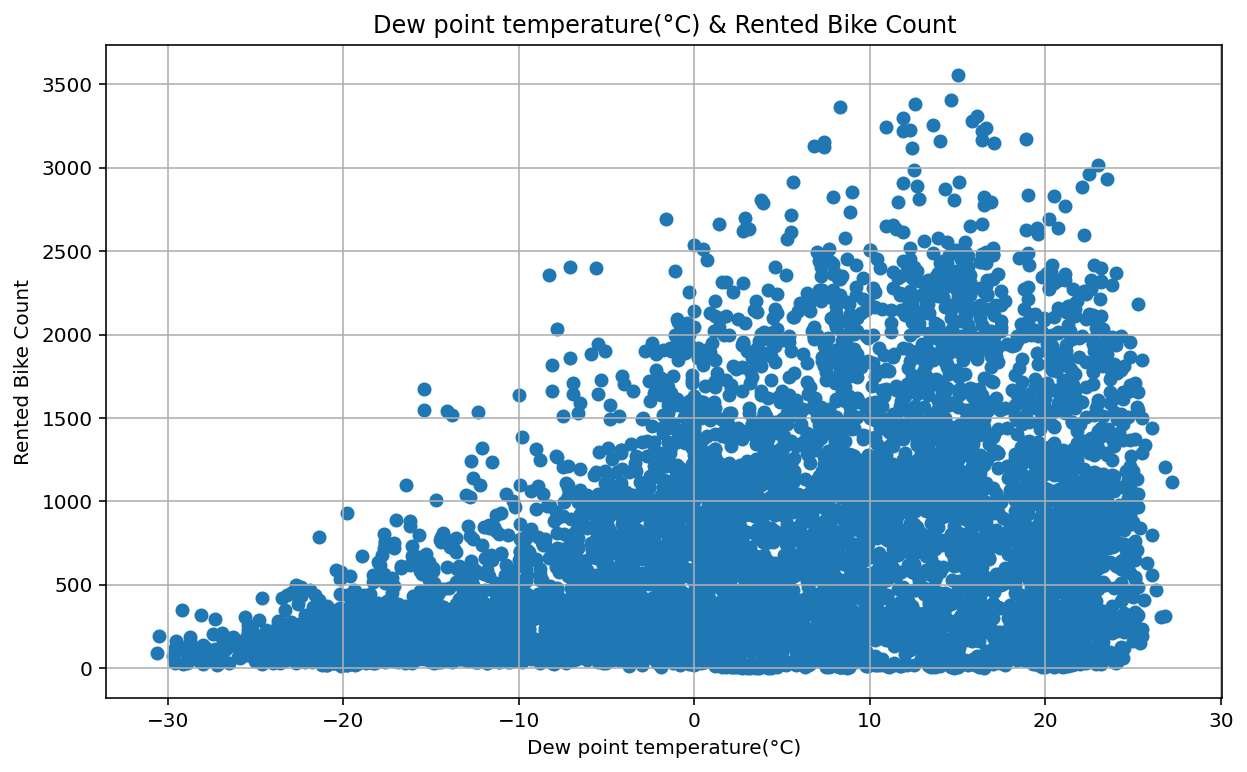

In [243]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Dew point temperature(°C)'], cycle['Rented Bike Count'])
plt.title('Dew point temperature(°C) & Rented Bike Count')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

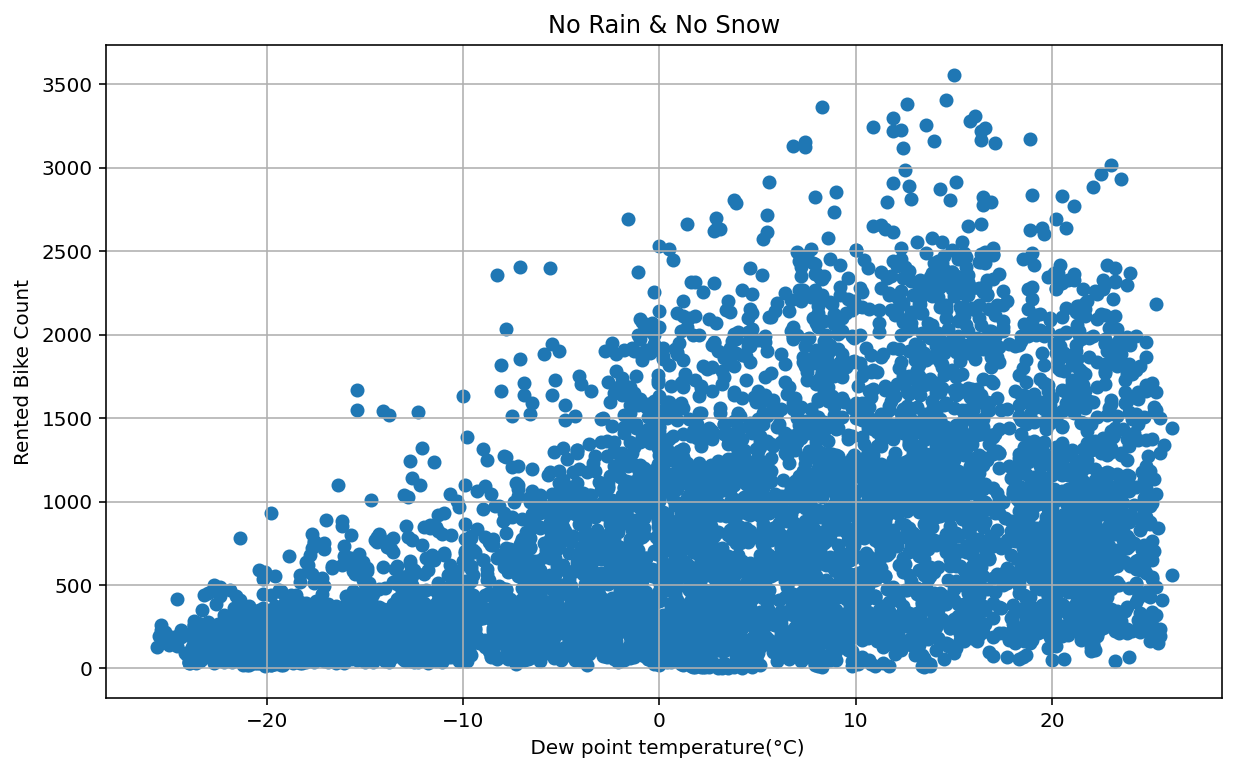

In [244]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Dew point temperature(°C)'], cycle[(cycle['Rainfall(mm)']==0) & (cycle['Snowfall (cm)']==0)]['Rented Bike Count'])
plt.title('No Rain & No Snow')
plt.xlabel(' Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

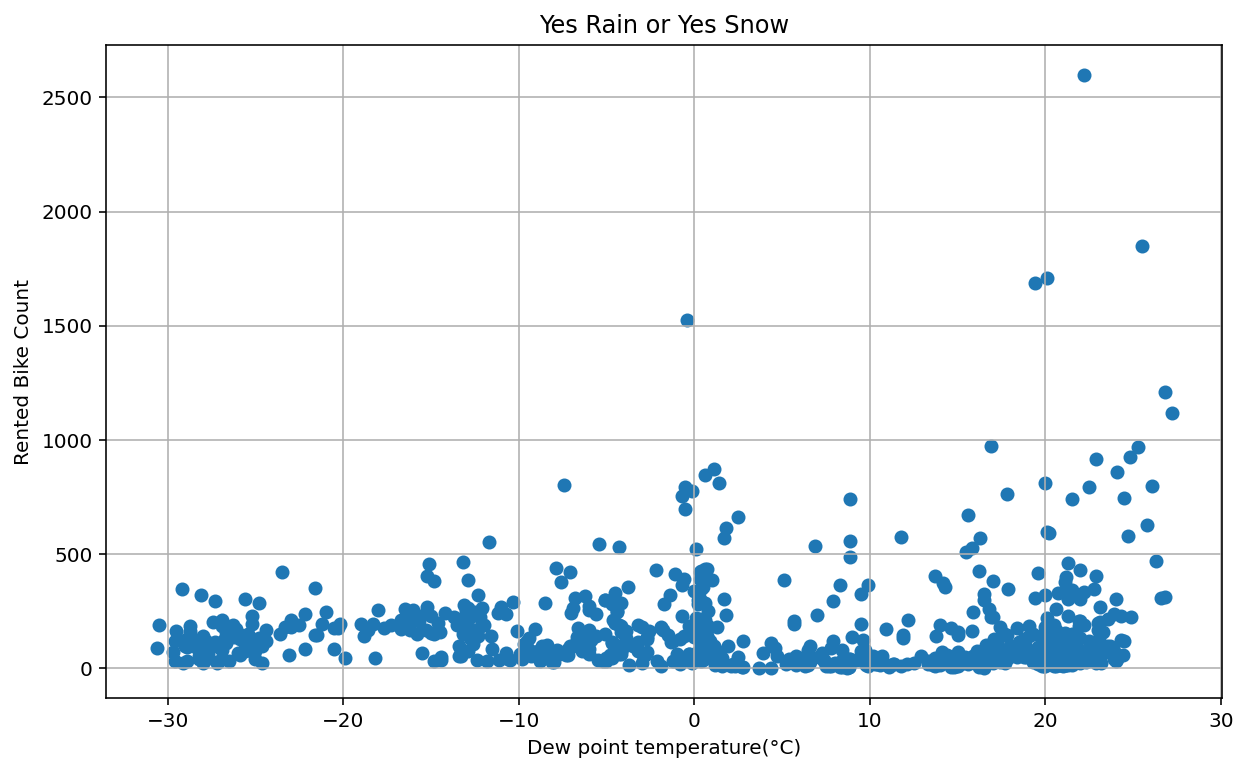

In [245]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Dew point temperature(°C)'], cycle[(cycle['Rainfall(mm)']!=0) | (cycle['Snowfall (cm)']!=0)]['Rented Bike Count'])
plt.title('Yes Rain or Yes Snow')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

#### + Dew point temperature(°C) & Rainfall(mm)

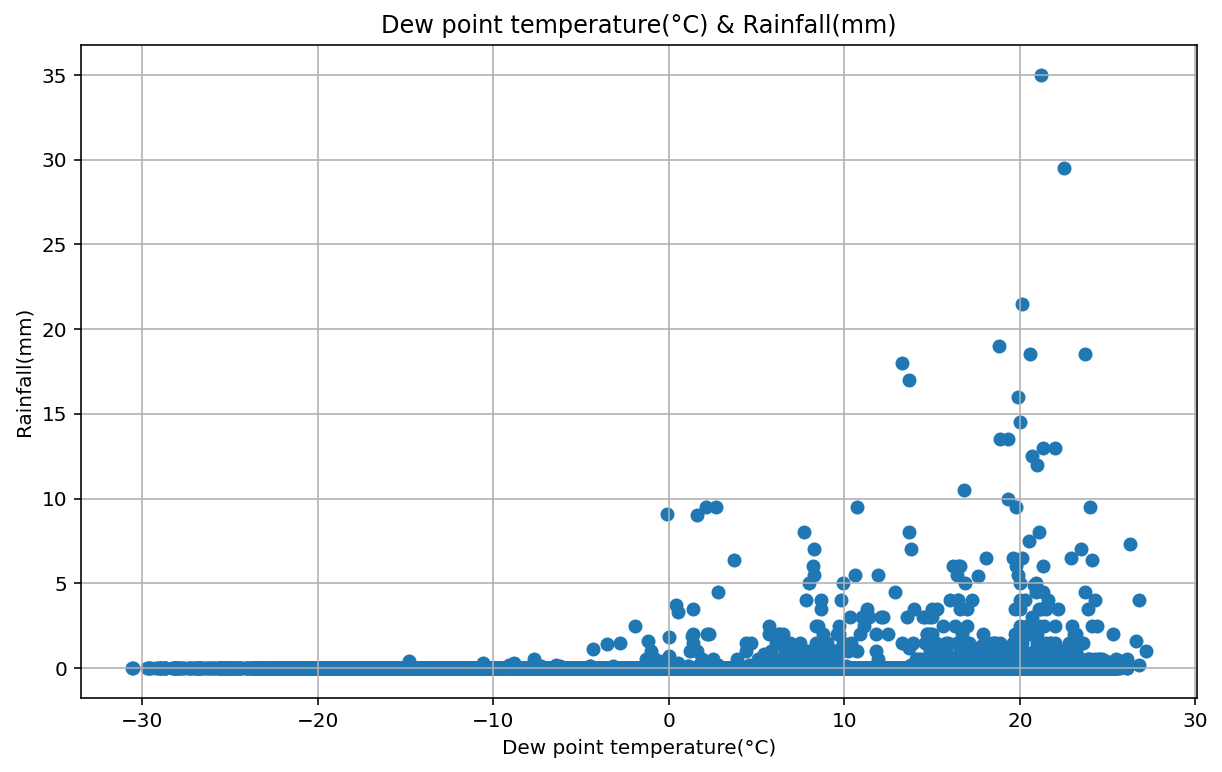

In [258]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Dew point temperature(°C)'],cycle['Rainfall(mm)'])
plt.title('Dew point temperature(°C) & Rainfall(mm)')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Rainfall(mm)')
plt.grid(True)
plt.show()

-> 이슬점이 약 0도인 시점부터 높아짐에 따라 강우량이 많아진다.

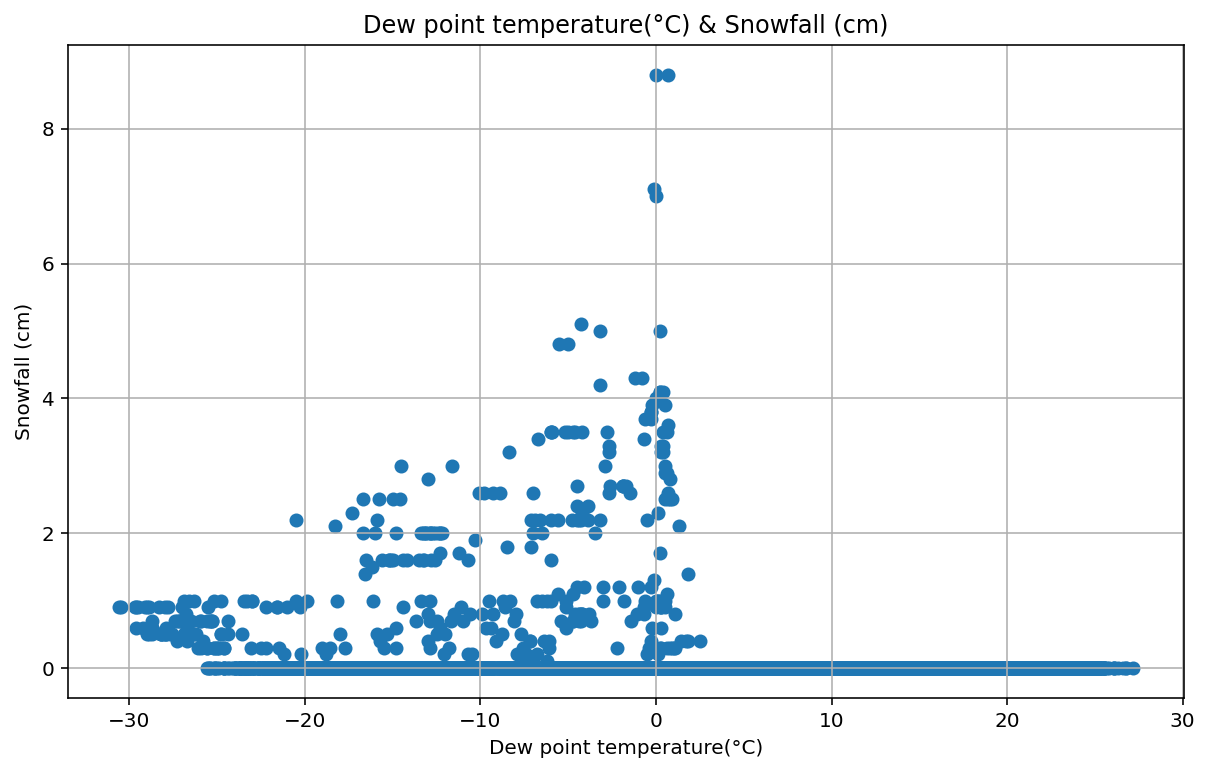

In [259]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Dew point temperature(°C)'],cycle['Snowfall (cm)'])
plt.title('Dew point temperature(°C) & Snowfall (cm)')
plt.xlabel('Dew point temperature(°C)')
plt.ylabel('Snowfall (cm)')
plt.grid(True)
plt.show()

-> 이슬점이 약 0도보다 작을 때, 이슬점이 높아짐에 따라 적설량이 많아진다.

#### 6-8. Solar Radiation (MJ/m2) & Rented Bike Count

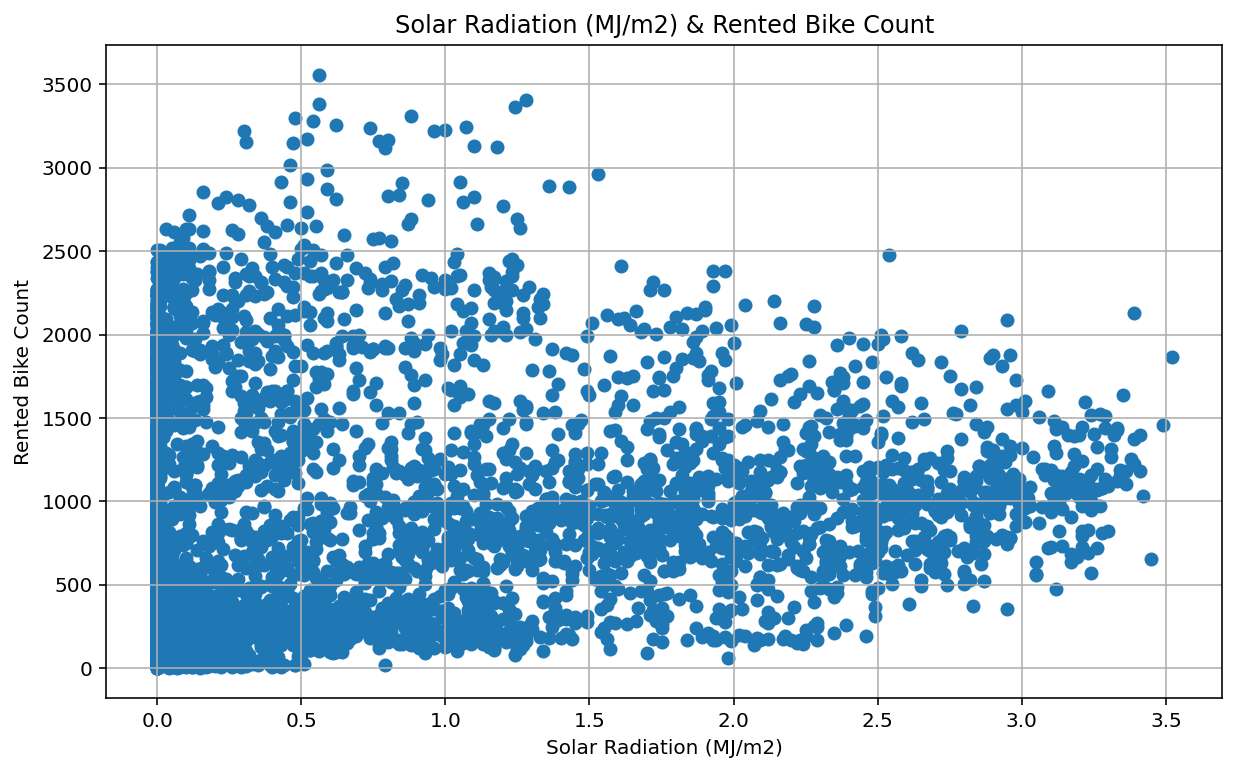

In [268]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Solar Radiation (MJ/m2)'],cycle['Rented Bike Count'])
plt.title('Solar Radiation (MJ/m2) & Rented Bike Count')
plt.xlabel('Solar Radiation (MJ/m2)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 태양복사열이 많아질수록 대여량이 줄어든다.

#### 6-9. Rainfall(mm) & Rented Bike Count

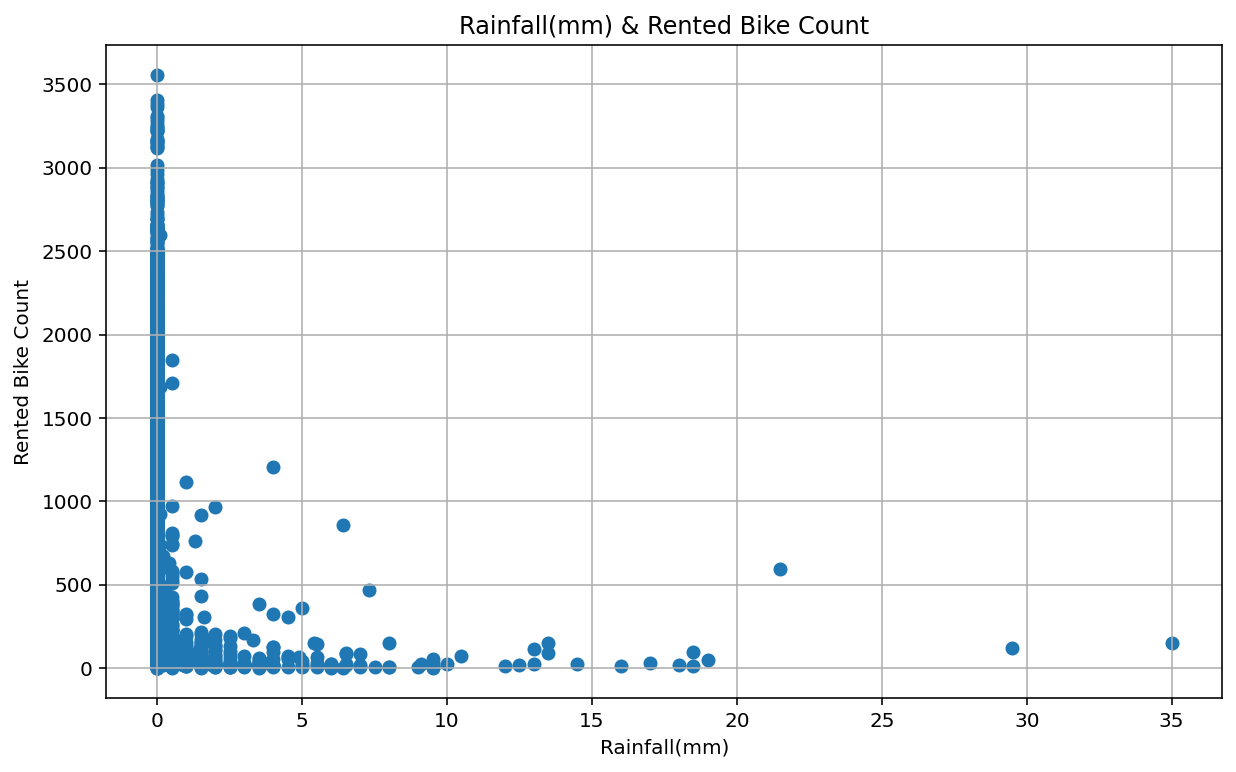

In [261]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Rainfall(mm)'],cycle['Rented Bike Count'])
plt.title('Rainfall(mm) & Rented Bike Count')
plt.xlabel('Rainfall(mm)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 강우량이 적을수록 대여량이 높다. (비가 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)

#### 6-10. Snowfall (cm) & Rented Bike Count

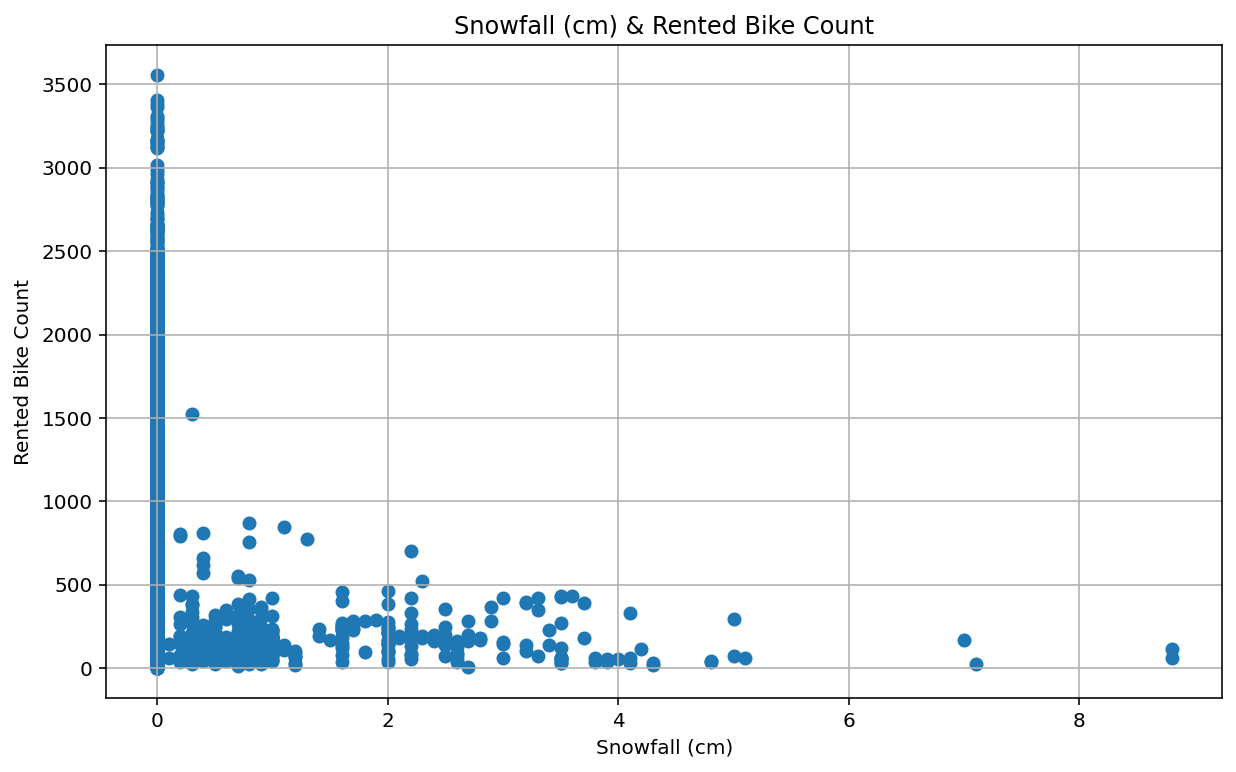

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(cycle['Snowfall (cm)'],cycle['Rented Bike Count'])
plt.title('Snowfall (cm) & Rented Bike Count')
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented Bike Count')
plt.grid(True)
plt.show()

-> 적설량이 적을수록 대여량이 높다. (눈이 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)

#### 6-11. Seasons & Rented Bike Count

- 겨울을 제외하고는 모두 대여량이 많고 그 중 여름에 대여량이 가장 많다.

<AxesSubplot:xlabel='Seasons', ylabel='Rented Bike Count'>

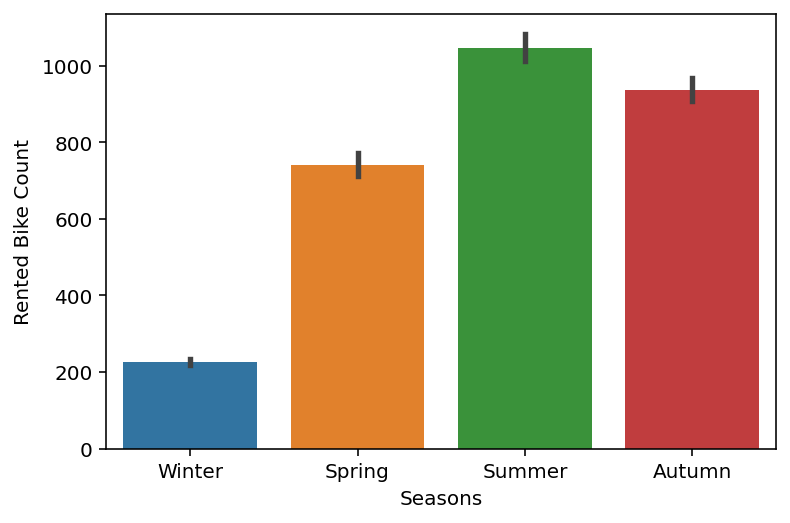

In [148]:
sns.barplot(x='Seasons',y='Rented Bike Count',data=cycle)

#### + Seasons & Rainfall(mm)

<AxesSubplot:xlabel='Seasons', ylabel='Rainfall(mm)'>

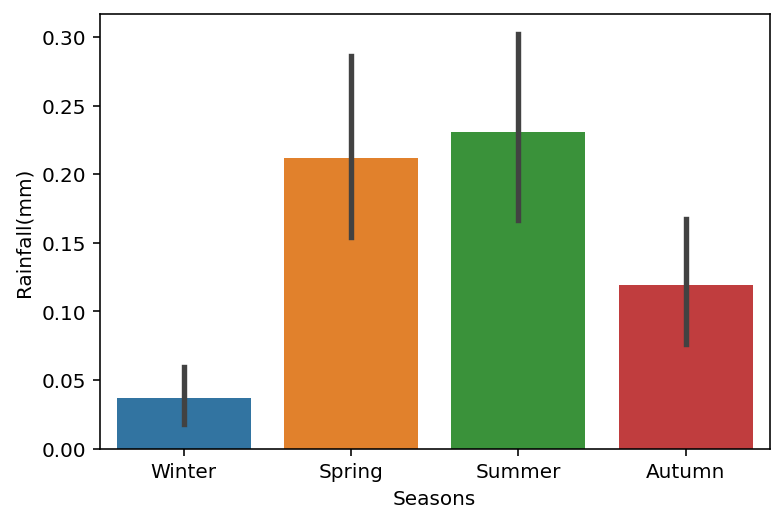

In [263]:
sns.barplot(x='Seasons',y='Rainfall(mm)',data=cycle)

-> 봄과 여름에 비가 많이 온다.

#### + Seasons & Snowfall (cm)

<AxesSubplot:xlabel='Seasons', ylabel='Snowfall (cm)'>

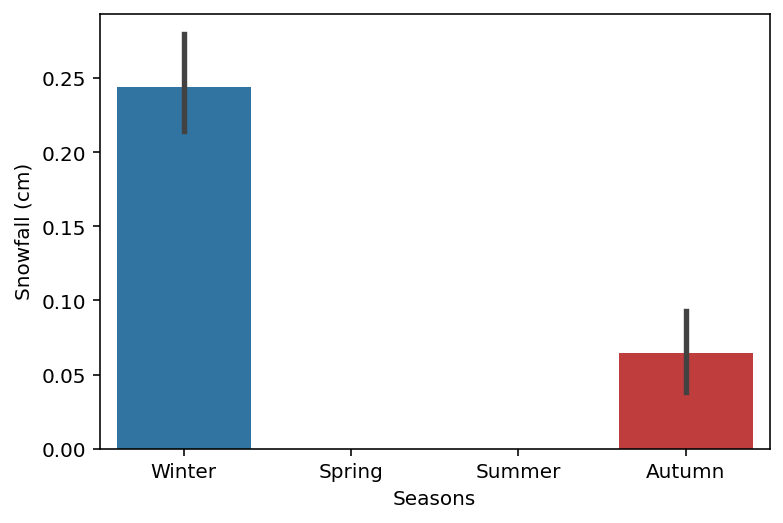

In [264]:
sns.barplot(x='Seasons',y='Snowfall (cm)',data=cycle)

-> 눈은 가을과 겨울에만 오고 그 중 겨울에 상대적으로 더 많이 온다

#### 6-12. Holiday & Rented Bike Count

- 휴일이 아닌 경우의 대여량이 더 많지만 휴일에 비해 휴일이 아닌 날의 수가 훨씬 많기 때문에 비율로 보았을 때, 휴일이 아닌 날에 자전거를 대여하는 비율이 약 96%, 휴일에 대여하는 비율이 약 3%로, 휴일이 아닌 날 자전거를 대여하는 비율이 훨씬 크다는 것을 알 수 있다.

<AxesSubplot:xlabel='Holiday', ylabel='count'>

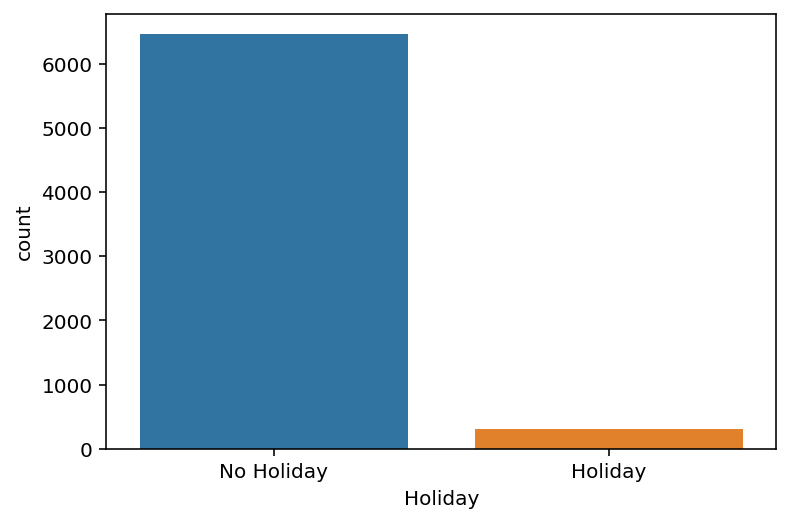

In [149]:
sns.countplot(x=cycle['Holiday']) #

<AxesSubplot:xlabel='Holiday', ylabel='Rented Bike Count'>

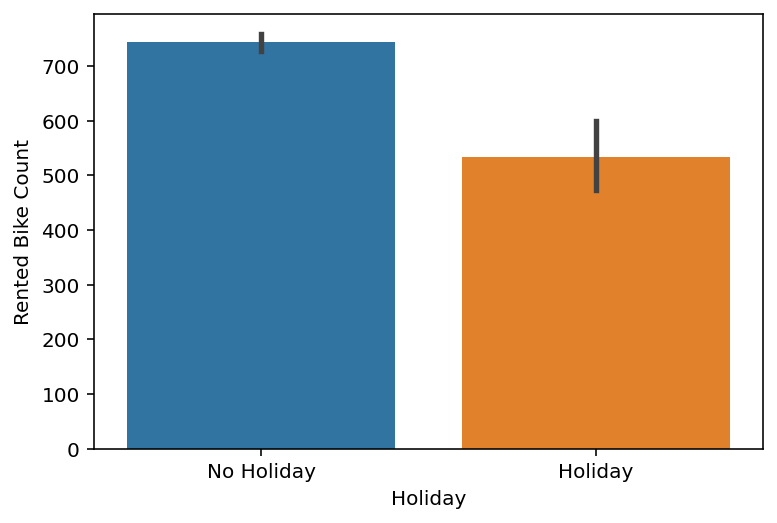

In [150]:
sns.barplot(x='Holiday',y='Rented Bike Count',data=cycle)

Holiday
Holiday        3.328714
No Holiday    96.671286
Name: Rented Bike Count, dtype: float64


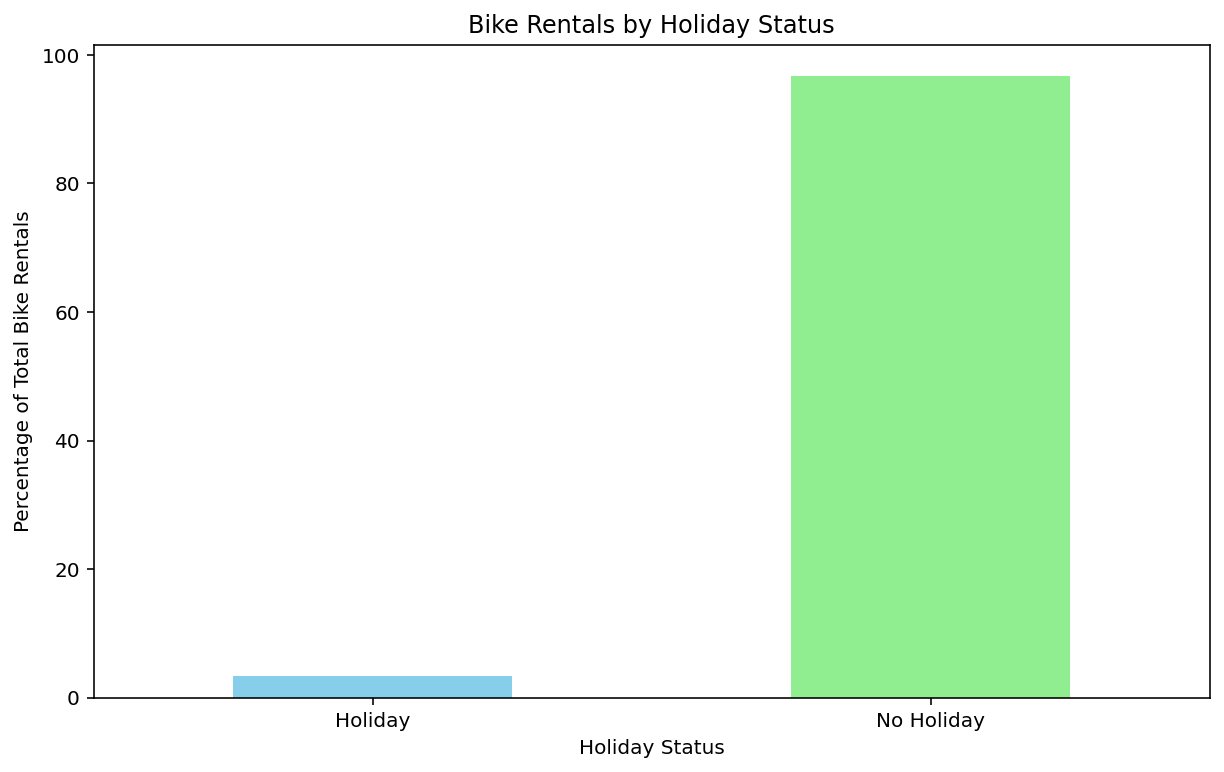

In [151]:
holiday_counts = cycle.groupby('Holiday')['Rented Bike Count'].sum()

# 비율 계산
total_rentals = holiday_counts.sum()
holiday_ratios = holiday_counts / total_rentals * 100

# 비율 출력
print(holiday_ratios)

# 비율 시각화 (막대 그래프)
plt.figure(figsize=(10, 6))
holiday_ratios.plot(kind='bar', color=['skyblue', 'lightgreen'])
plt.title('Bike Rentals by Holiday Status')
plt.xlabel('Holiday Status')
plt.ylabel('Percentage of Total Bike Rentals')
plt.xticks(rotation=0)
plt.show()

휴일의 시간대 별 자전거 대여량

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

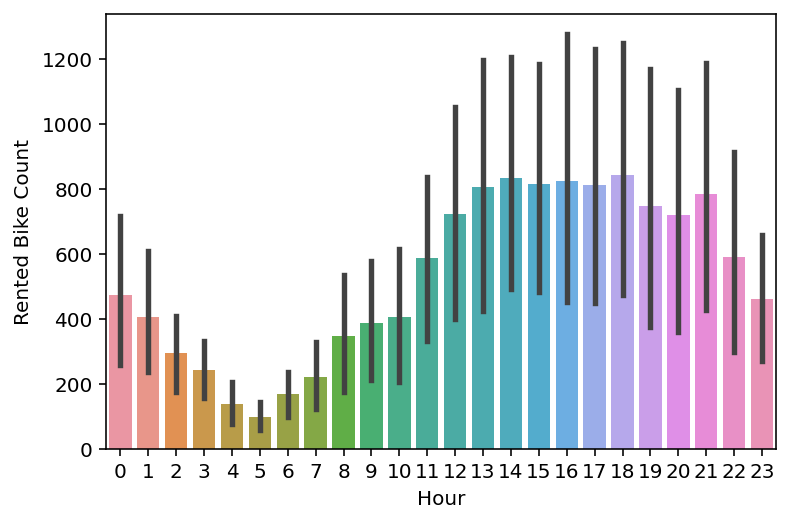

In [282]:
sns.barplot(x='Hour',y='Rented Bike Count',data=cycle[cycle['Holiday']=='Holiday'])

-> 휴일이라고 낮시간대에 특별히 많은 대여량이 보이진 않는다.

<AxesSubplot:xlabel='Hour', ylabel='Rented Bike Count'>

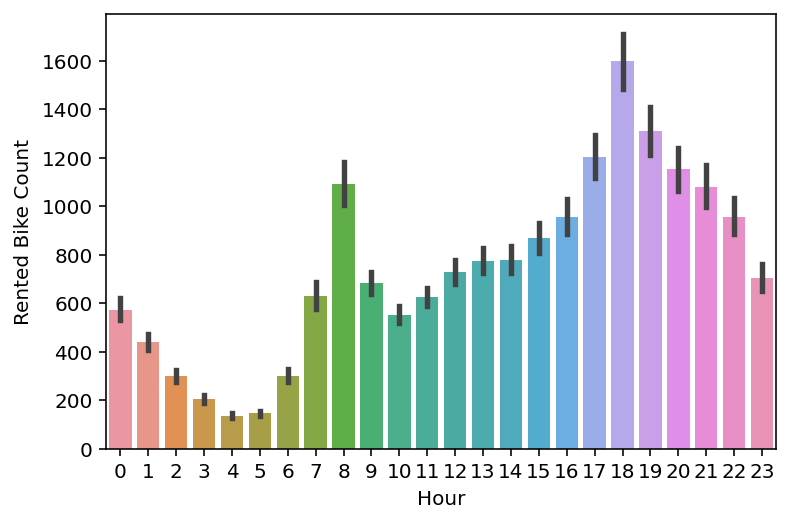

In [283]:
sns.barplot(x='Hour',y='Rented Bike Count',data=cycle[cycle['Holiday']=='No Holiday'])

평일이기 때문에 출퇴근 시간의 대여량이 돋보인다.

#### 6-13. Functioning Day & Rented Bike Count

위에서 보였듯이 Functioning Day가 Yes인 경우에만 대여량이 존재했다.

#### 6-14. Month & Rented Bike Count

- 6월달의 대여량이 가장 많다.

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

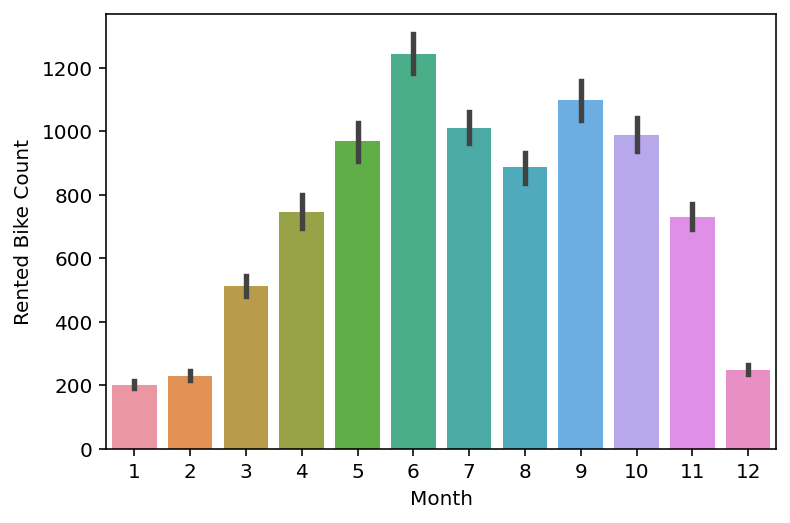

In [152]:
sns.barplot(x='Month',y='Rented Bike Count',data=cycle)

- 학생들 여름방학인 7, 8월에 대여량이 많을 것이라는 가설이 맞기도 하지만 7, 8월의 데이터가 눈에 띌 정도는 아닌 것 같다.
- 3월말에서 중순에 자전거 대여량이 특별히 많지는 않다.

<AxesSubplot:xlabel='Month', ylabel='Rented Bike Count'>

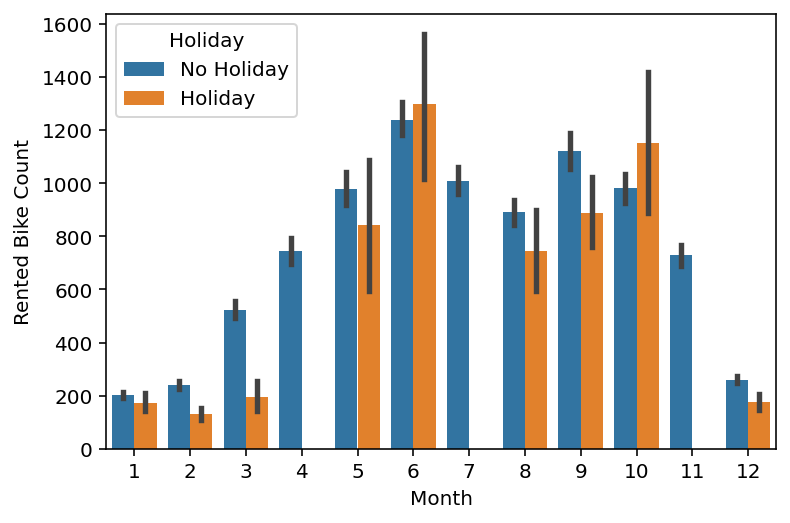

In [153]:
sns.barplot(x='Month',y='Rented Bike Count',data=cycle,hue='Holiday')

#### 6-15. Day Of Week & Rented Bike Count

<AxesSubplot:xlabel='Day Of Week', ylabel='Rented Bike Count'>

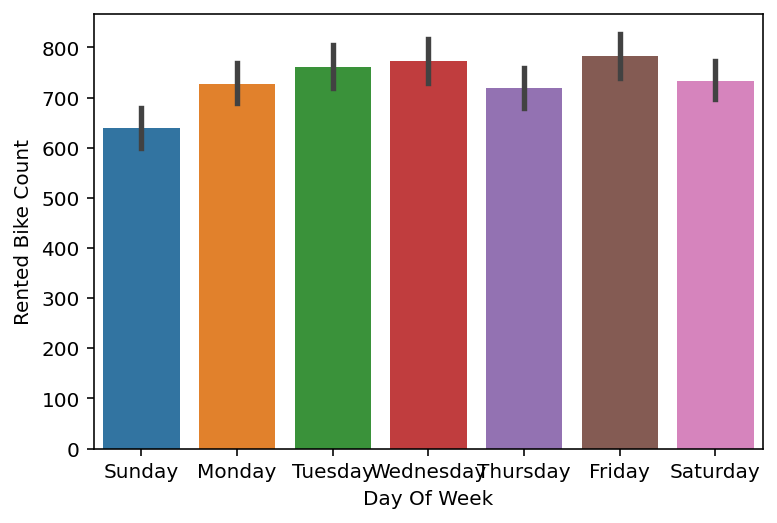

In [269]:
sns.barplot(x='Day Of Week',y='Rented Bike Count',data=cycle,order=day_order)

-> 요일별로 골고루 자전거 대여 데이터 양이 나눠져있다.

# 7. 가설 검정

- 기온이 높으면 자전거 대여 수가 적을 것이다.
> 약 30도까지는 기온이 높을수록 대여량이 높아졌고 그 이후로는 대여량이 줄어들었다.
- 습도가 높으면 자전거 대여 수가 적을 것이다.
> 습도가 60%인 지점을 기준으로 높아지거나 낮아질수록 대여량이 감소한다.
- 바람 세기가 세면 자전거 대여 수가 적을 것이다.
> 4m/s이상으로 풍속이 커지게 되면 대여량이 줄어드는 것을 알 수 있다.
- 태양 복사열이 세면 자전거 대여 수가 적을 것이다.
> 태양복사열이 많아질수록 대여량이 줄어들었다.
- 강우량이 많으면 자전거 대여 수가 적을 것이다.
> 강우량이 적을수록 대여량이 높다. (비가 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)
- 적설량이 많으면 자전거 대여 수가 적을 것이다.
> 적설량이 적을수록 대여량이 높다. (눈이 안오는 날 자전거를 탈 확률이 당연히 높기 때문이다.)
- 겨울이 가장 자전거 대여 수가 적을 것이다.
> 겨울에는 춥기 때문에 당연히 자전거를 많이 타지 않는다.
- 휴일이 평일에 비해 자전거 대여 수가 많을 것이다.
> 휴일에 자전거를 타는 사람의 비율이 평일에 자전거를 타는 사람의 비율에 비해 훨씬 큰 것으로 나타났다.
- 기능 가능일에만 자전거를 대여할 수 있을 것이다.
> Yes인 경우에만 대여량이 측정되어있다.
- 학생들 여름방학 기간인 7, 8월에는 자전거 사용량이 많을 것이다. (대학생뿐만 아니라 초중고 학생들도 방학이므로)
> 눈에 띄게 7,8월이 많아보이진 않지만 높은 편에 속한다.
- 벚꽃놀이 시즌인 3월 말에서 4월 중순에 자전거 대여량이 많을 것이다.
> 3월말에서 중순에 자전거 대여량이 특별히 많지는 않다.

- 휴일에는 나들이 나온 사람들의 사용량이 많을 것이다. 따라서 낮 시간대 사용량이 많을 것이다.
> 휴일이라고 낮시간대에 특별히 많은 대여량이 보이진 않는다.
- 평일에는 직장인들의 출퇴근길 시간에 사용량이 많을 것이다.
> 정확하다.